# Import Basic Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv('aug_train.csv')
print(df.shape)
df.head()

(19158, 14)


enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [3]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [4]:
target = 'target'
df[target] = df[target].astype(str)

# Data Exploration

## Continuous Variables

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_variables = list(df.select_dtypes(include=numerics).columns)
num_variables.remove('enrollee_id')
print(num_variables)

['city_development_index', 'training_hours']


In [6]:
def continuous_explore(df,col,target,hue=True,solo=True,scatter=True,line=True,strip=True,
                swarm=False,histogram=True,density=True,box=True,violin=True,cdf=True):
    """
    In case of continuous variables, we need to understand the central tendency and 
    spread of the variable.
    
    1. Scatter Plot: This plots different observations/values of the same variable 
    corresponding to the index/observation number.

    2. Line Plot: A line plot visualizes data by connecting the data points via line 
    segments. It is similar to a scatter plot except that the measurement points 
    are ordered (typically by their x-axis value) and joined with straight 
    line segments (For Time-Series)
    
    3. Strip Plot: The strip plot is similar to a scatter plot. It is often used 
    along with other kinds of plots for better analysis. It is used to visualize 
    the distribution of data points of the variable.
    
    4. Swarm Plot: The swarm-plot, similar to a strip-plot, provides a visualization
    technique for univariate data to view the spread of values in a continuous 
    variable. The only difference between the strip-plot and the swarm-plot is that
    the swarm-plot spreads out the data points of the variable automatically to 
    avoid overlap and hence provides a better visual overview of the data.
    
    5. Histogram: Histograms are similar to bar charts which display the counts or
    relative frequencies of values falling in different class intervals or ranges.
    A histogram displays the shape and spread of continuous sample data. It also 
    helps us understand the skewness and kurtosis of the distribution of the data.
    
    6. Density Plot: A density plot is like a smoother version of a histogram. 
    Generally, the kernel density estimate is used in density plots to show the 
    probability density function of the variable. A continuous curve, which is the 
    kernel is drawn to generate a smooth density estimation for the whole data.
    
    7. Box Plot: A box-plot is a very useful and standardized way of displaying the 
    distribution of data based on a five-number summary (minimum, first quartile, 
    second quartile(median), third quartile, maximum). It helps in understanding 
    these parameters of the distribution of data and is extremely helpful in 
    detecting outliers.
    
    8. Violin Plot: The Violin plot is very much similar to a box plot, with the 
    addition of a rotated kernel density plot on each side. It shows the distribution
    of quantitative data across several levels of one (or more) categorical variables
    such that those distributions can be compared.
    
    9. Cumulative Distributive Function
    
    """
    
    print(df[col].describe())
    
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    
    # Scatter Plot
    if scatter == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.scatter(df.index,df[col])        
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Scatter Plot",fontdict = font1)
        plt.tight_layout()
        plt.show()
    
    # Scatter Plot With Hue
    if scatter == True and hue == True:
        plt.figure(figsize=(15,8))
        g = sns.scatterplot(x=df.index,y=df[col],hue=df[target])
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Scatter Plot",fontdict = font1)
        plt.tight_layout()
        plt.show()
    
    # Line Plot
    if line == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Line Plot",fontdict = font1)
        plt.plot(df.index,df[col],markevery=1,marker='d')
        plt.tight_layout()
        plt.show()
    
    # Line Plot With Hue
    if line == True and hue == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Line Plot",fontdict = font1)
        g = sns.lineplot(x=df.index,y=df[col],hue=df[target],markevery=1,marker='d')
        plt.tight_layout()
        plt.show()
    
    # Strip Plot
    if strip == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.title("Strip Plot",fontdict = font1)
        g = sns.stripplot(y=df[col])
        plt.tight_layout()
        plt.show()
    
    # Strip Plot With Hue
    if strip == True and hue == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Strip Plot",fontdict = font1)
        g = sns.stripplot(x=df[target],y=df[col])
        plt.tight_layout()
        plt.show()
    
    # Swarm Plot
    if swarm == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Swarm Plot",fontdict = font1)
        g = sns.swarmplot(x=df[col])
        plt.tight_layout()
        plt.show()
    
    # Swarm Plot With Hue
    if swarm == True and hue == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.xlabel("index",fontdict = font2)
        plt.title("Swarm Plot",fontdict = font1)
        g = sns.swarmplot(x=df[target],y=df[col])
        plt.tight_layout()
        plt.show()
    
    # Histogram
    if histogram == True:
        plt.figure(figsize=(15,8))
        plt.xlabel(f"{col}",fontdict = font2)
        plt.ylabel("count",fontdict = font2)
        plt.title("Histogram",fontdict = font1)
        g = sns.histplot(x=df[col],kde=False,color='black',bins=10)
        plt.tight_layout()
        plt.show()
        
    # Density Plot
    if density == True:
        plt.figure(figsize=(15,8))
        plt.xlabel(f"{col}",fontdict = font2)
        plt.ylabel("density",fontdict = font2)
        plt.title("Density Plot",fontdict = font1)
        g = sns.kdeplot(x=df[col],shade=True)
        plt.tight_layout()
        plt.show()
    
    # Box Plot
    if box == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.title("Box Plot",fontdict = font1)
        g = sns.boxplot(y=df[col])
        plt.tight_layout()
        plt.show()
        
    # Box Plot
    if box == True and hue == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.title("Box Plot",fontdict = font1)
        g = sns.boxplot(x=df[target],y=df[col])
        plt.tight_layout()
        plt.show()
        
    # Violin Plot
    if violin == True and solo == True:
        plt.figure(figsize=(15,8))
        plt.ylabel(f"{col}",fontdict = font2)
        plt.title("Violin Plot",fontdict = font1)
        g = sns.violinplot(y=df[col],orient='v')
        plt.tight_layout()
        plt.show()
        
    # Violin Plot Hue
    if violin == True and hue == True:
        plt.figure(figsize=(15,8))
        plt.xlabel(f"{col}",fontdict = font2)
        plt.ylabel("Scale",fontdict = font2)
        plt.title("Violin Plot",fontdict = font1)
        g = sns.violinplot(x=df[target],y=df[col],orient='v')
        plt.tight_layout()
        plt.show()
        
    # Cumulative Distributive Function
    if cdf == True:
        counts,bin_edges = np.histogram(df[col],bins=10,density=True)
        plt.xlabel(f"{col}",fontdict = font2)
        pdf = counts/sum(counts)
        cdf = np.cumsum(pdf)
        print(f'pdf = {pdf}')
        print(f'cdf = {cdf}')
        print(f'bin edges = {bin_edges}')
        plt.plot(bin_edges[1:],pdf)
        plt.plot(bin_edges[1:],cdf)

city_development_index
count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64


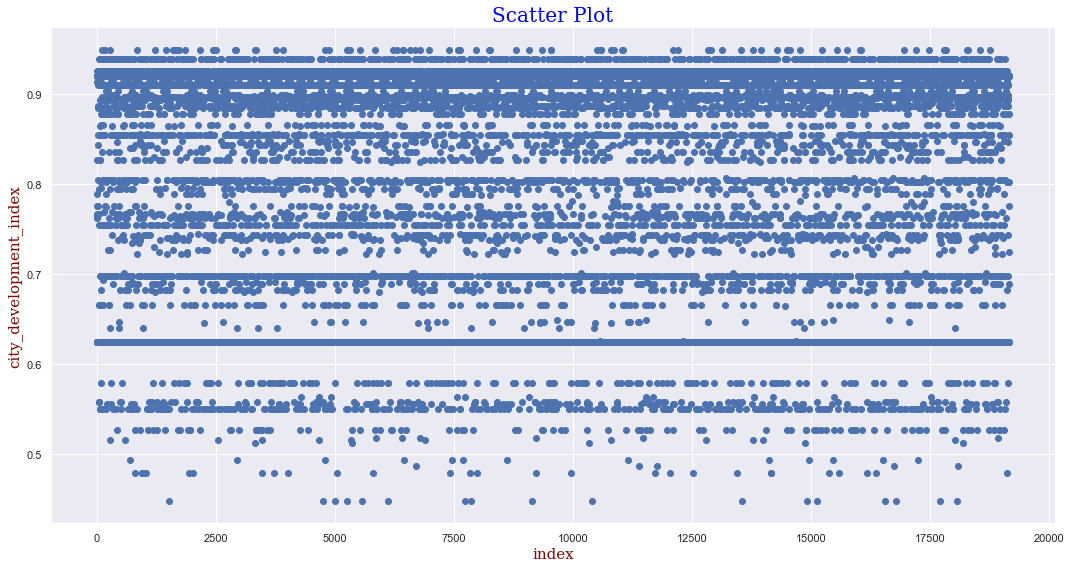

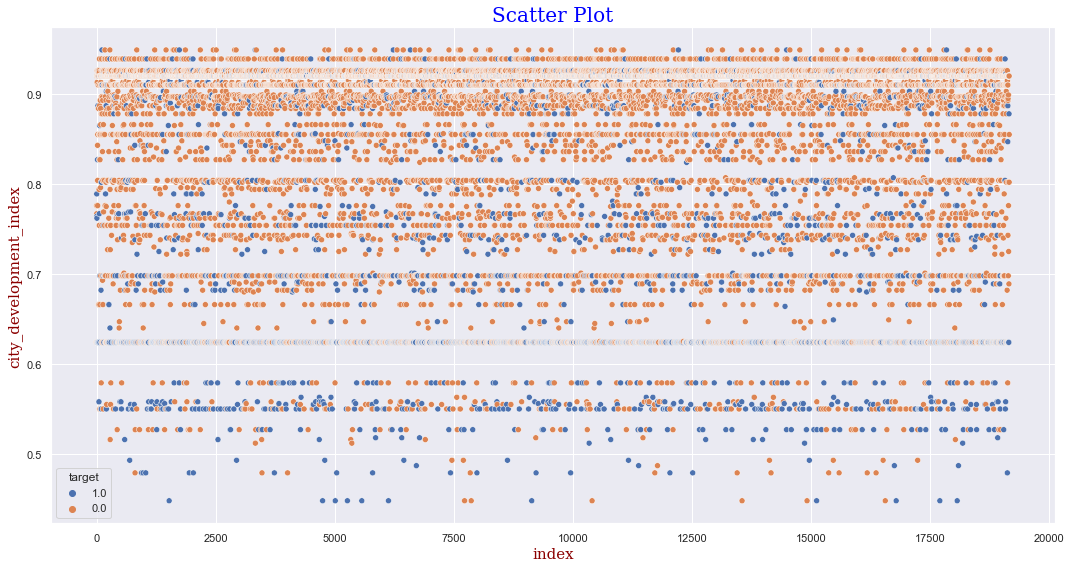

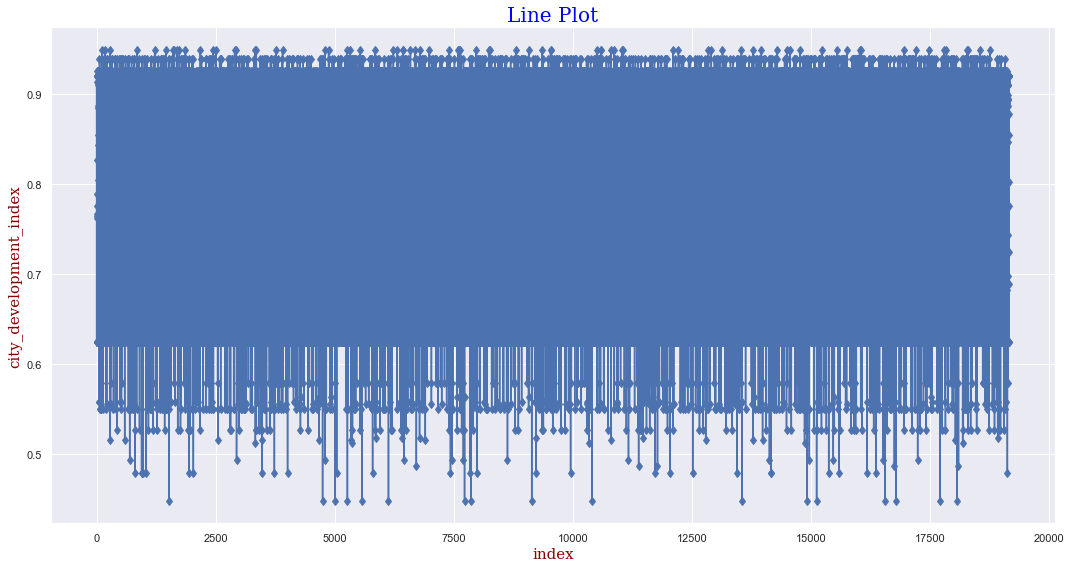

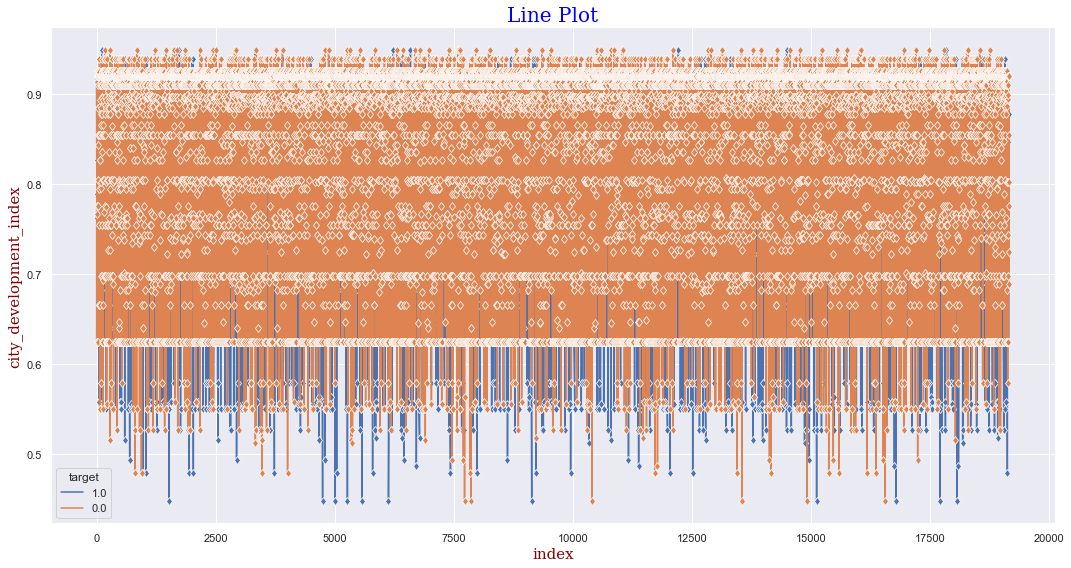

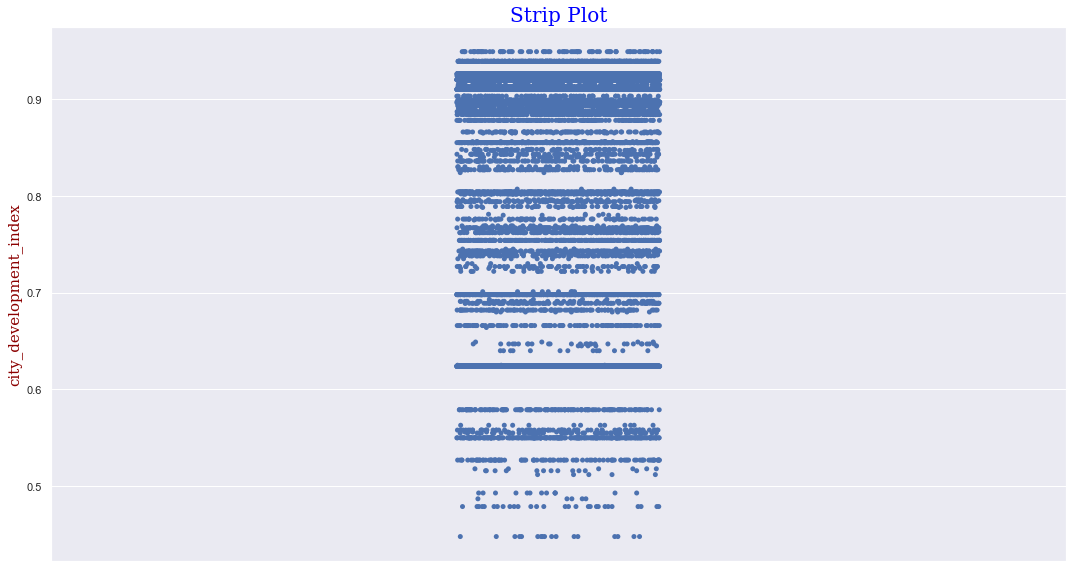

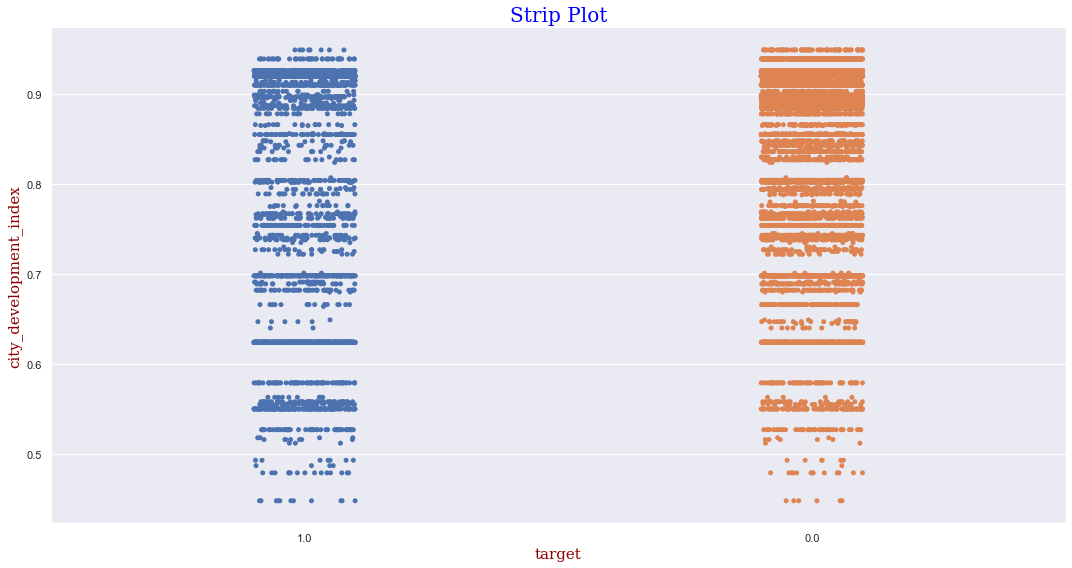

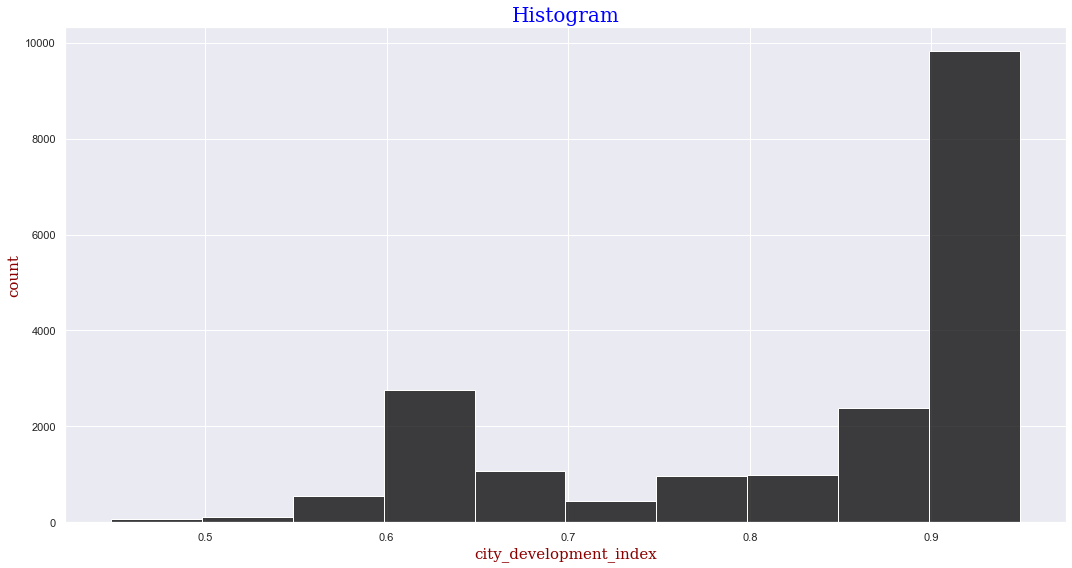

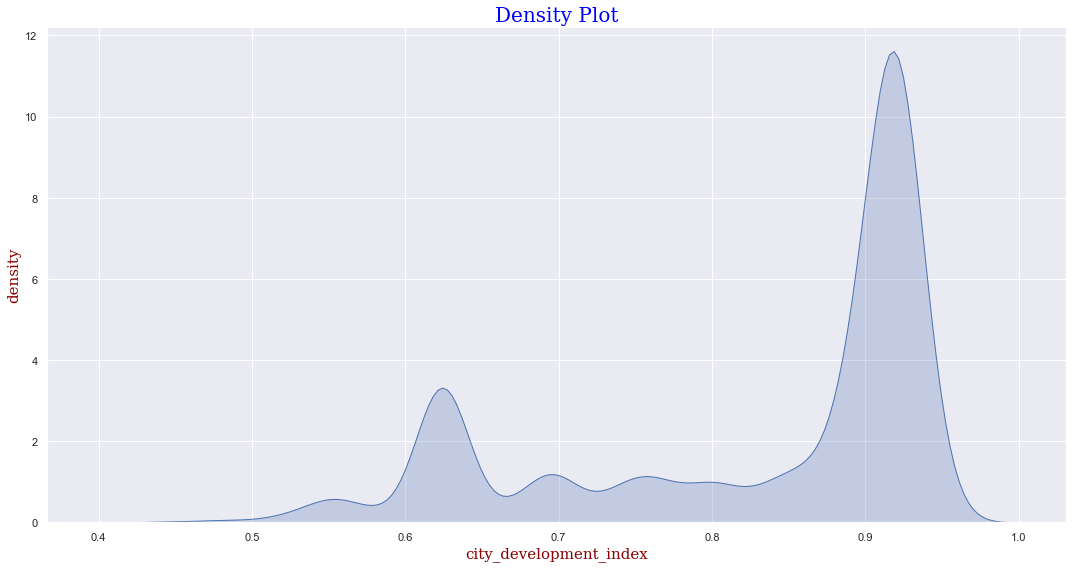

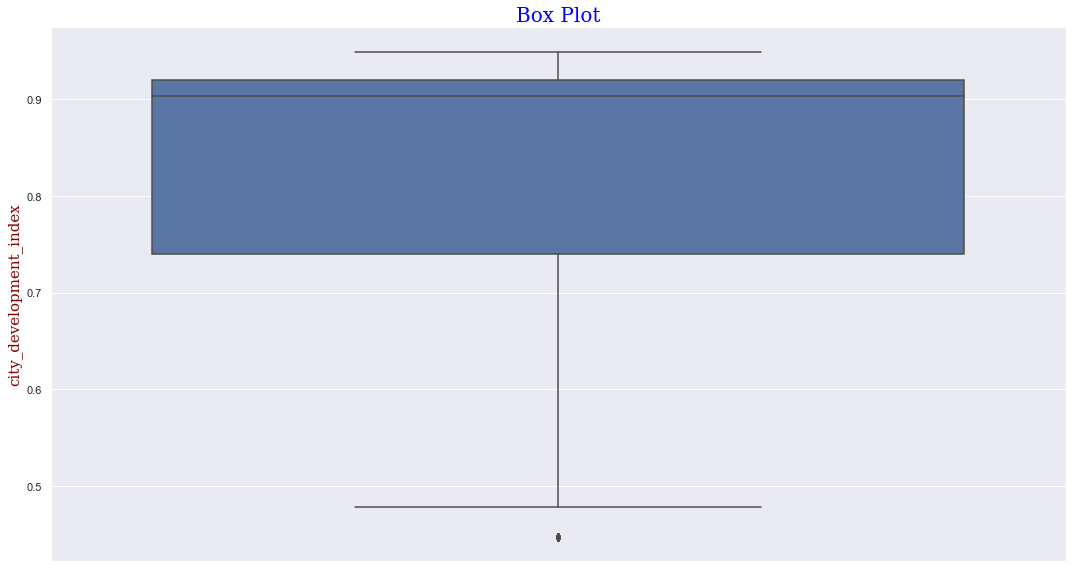

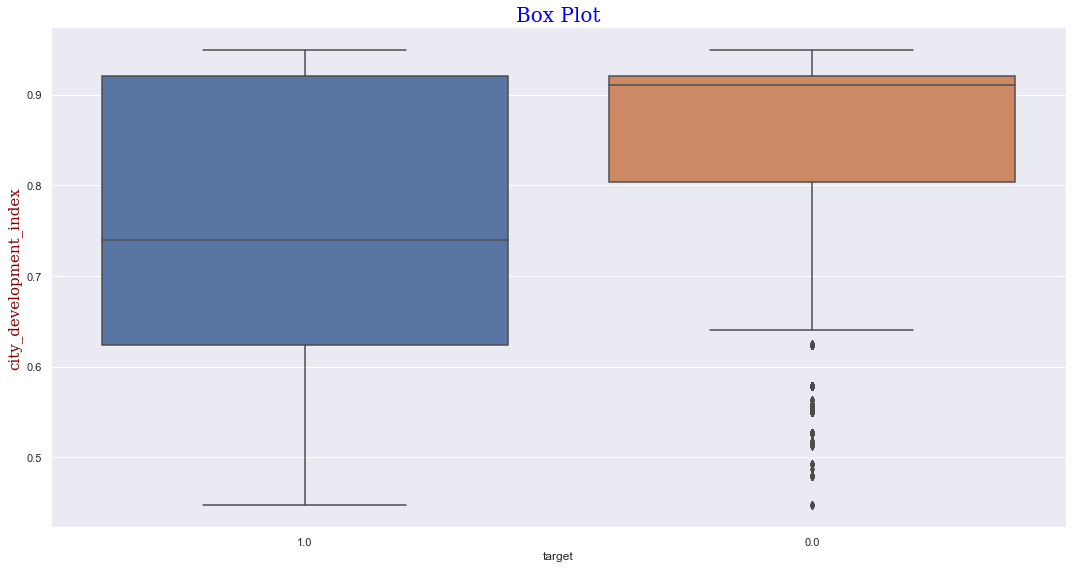

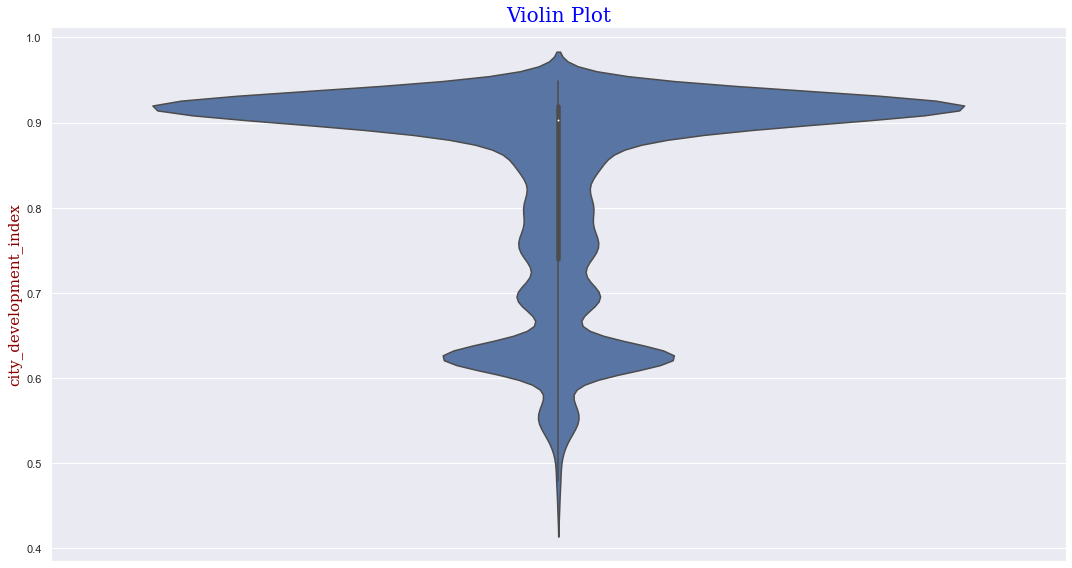

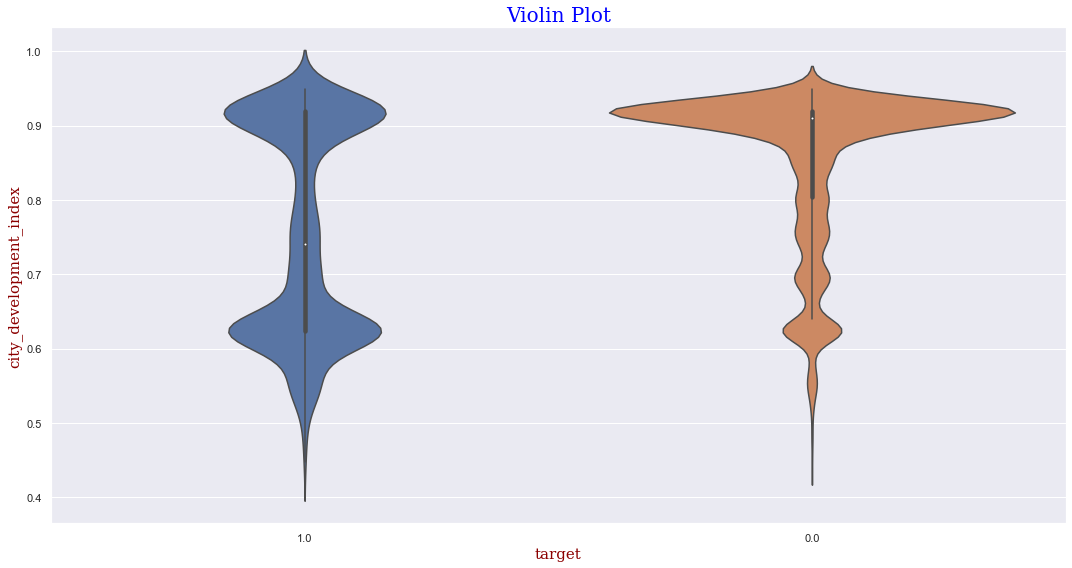

pdf = [0.00328844 0.00600271 0.02855204 0.14354317 0.05642551 0.02338449
 0.05021401 0.05151895 0.12423009 0.51284059]
cdf = [0.00328844 0.00929116 0.0378432  0.18138637 0.23781188 0.26119637
 0.31141038 0.36292932 0.48715941 1.        ]
bin edges = [0.448  0.4981 0.5482 0.5983 0.6484 0.6985 0.7486 0.7987 0.8488 0.8989
 0.949 ]



training_hours
count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64


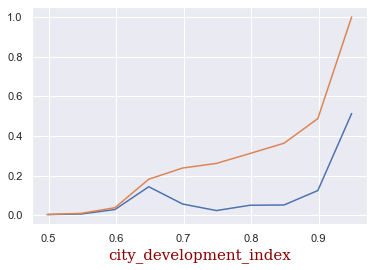

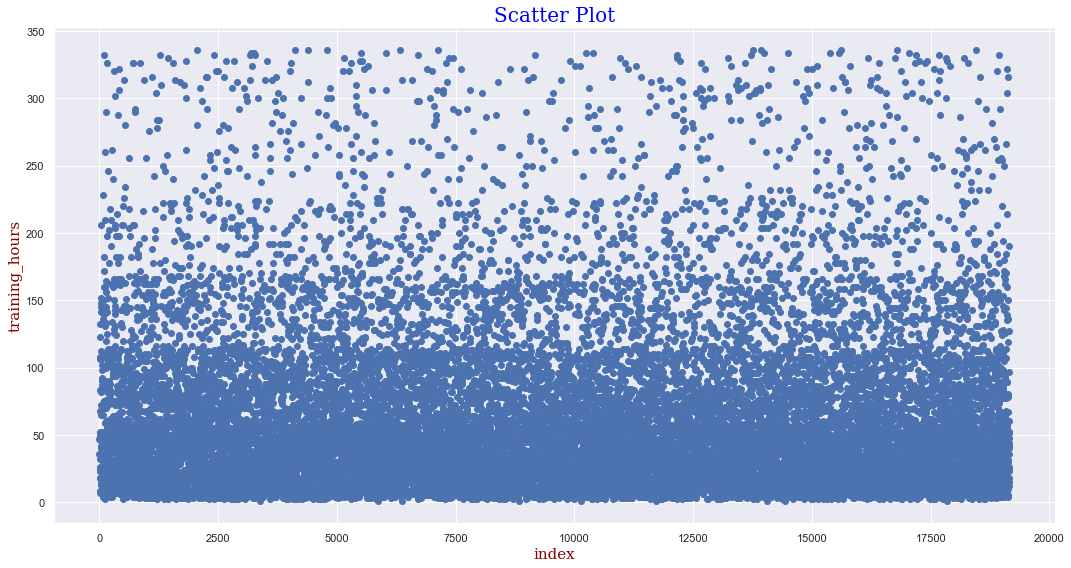

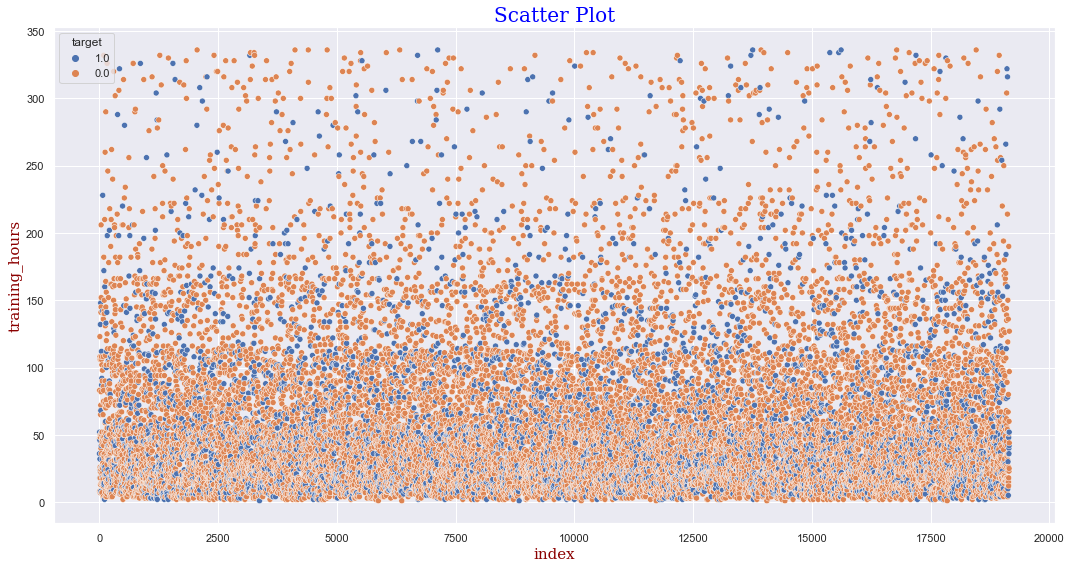

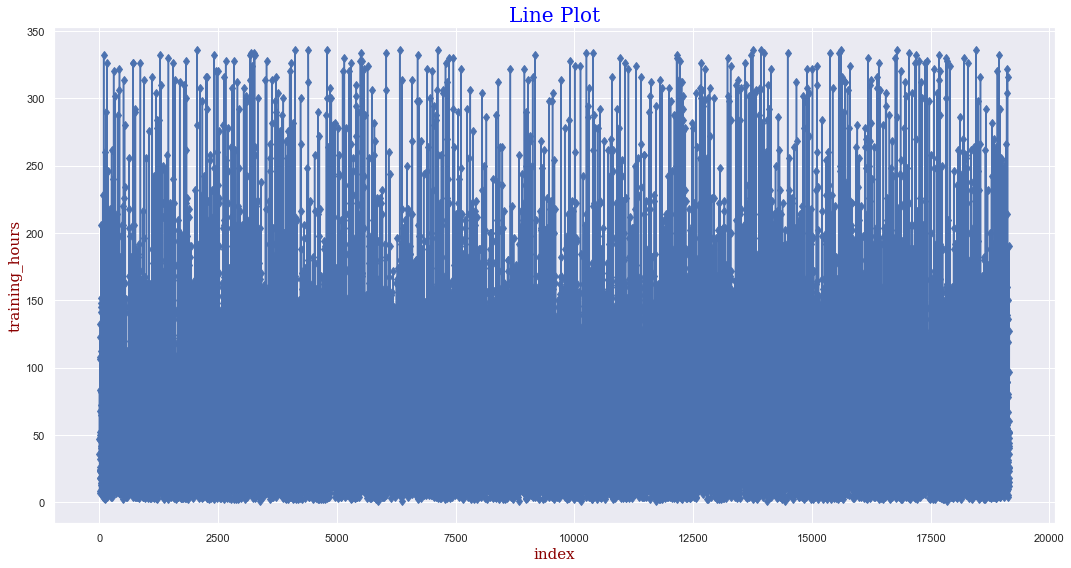

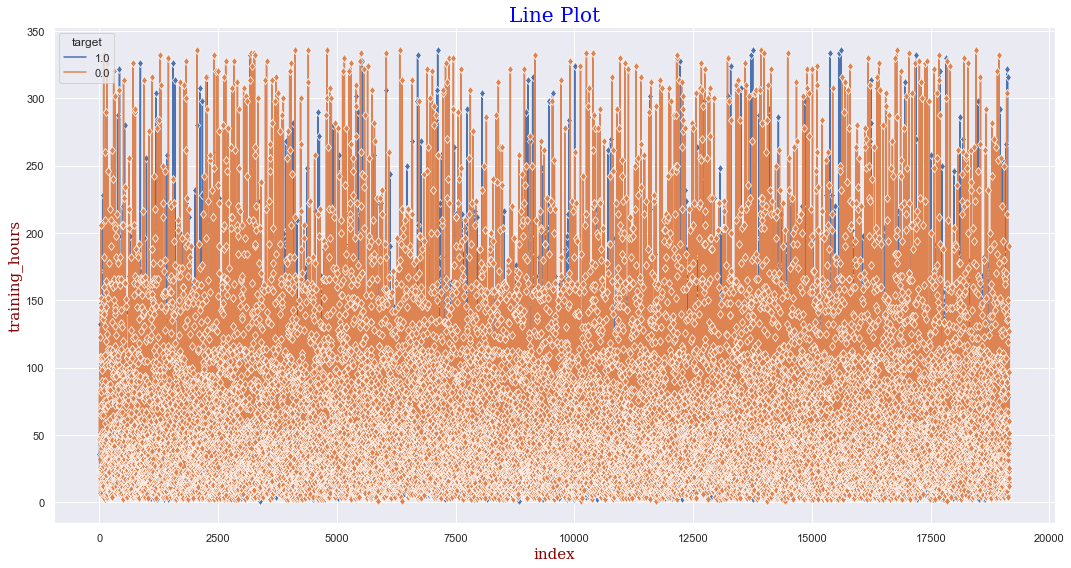

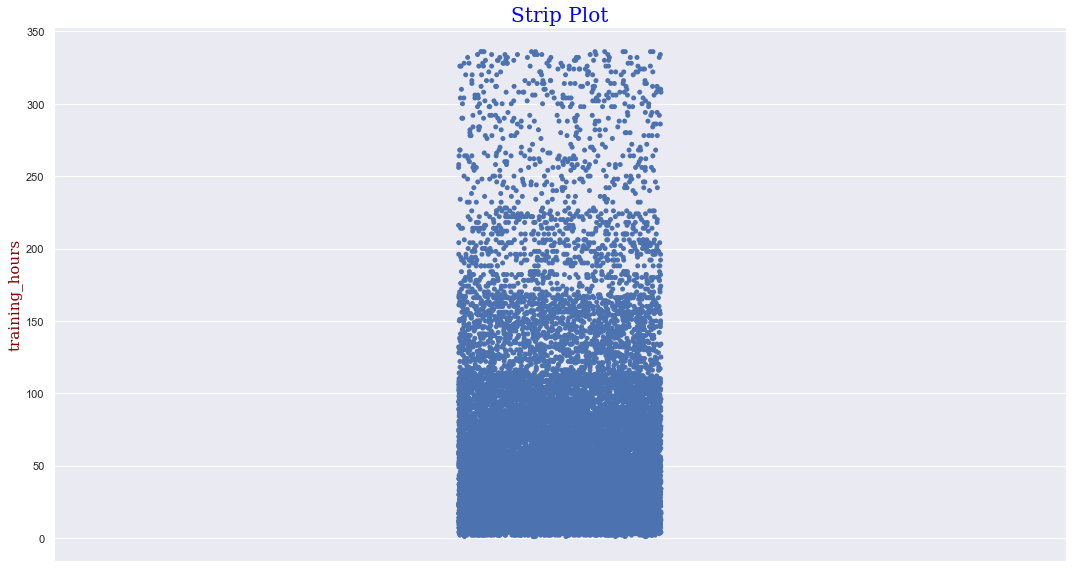

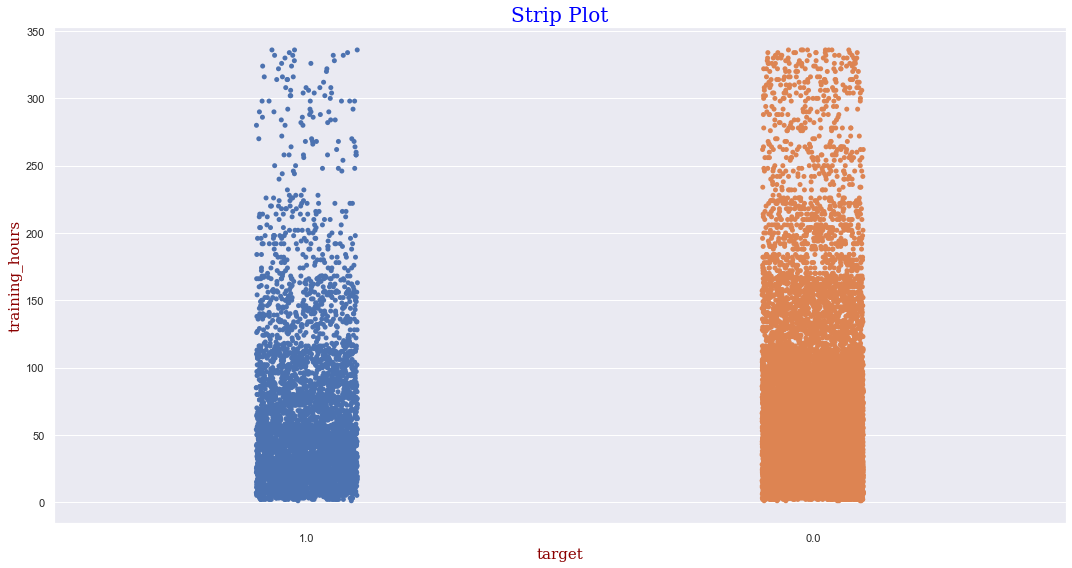

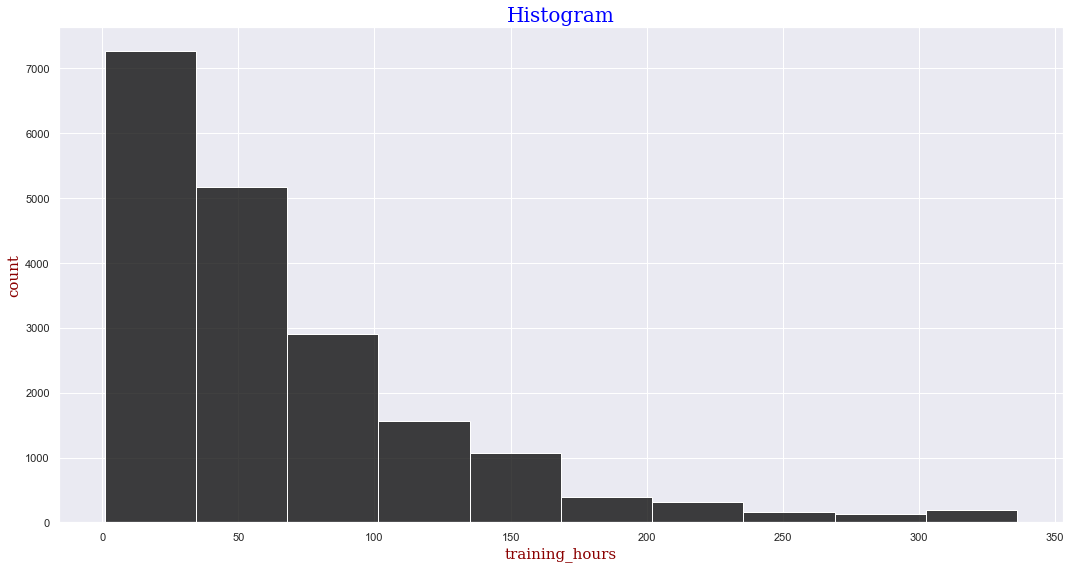

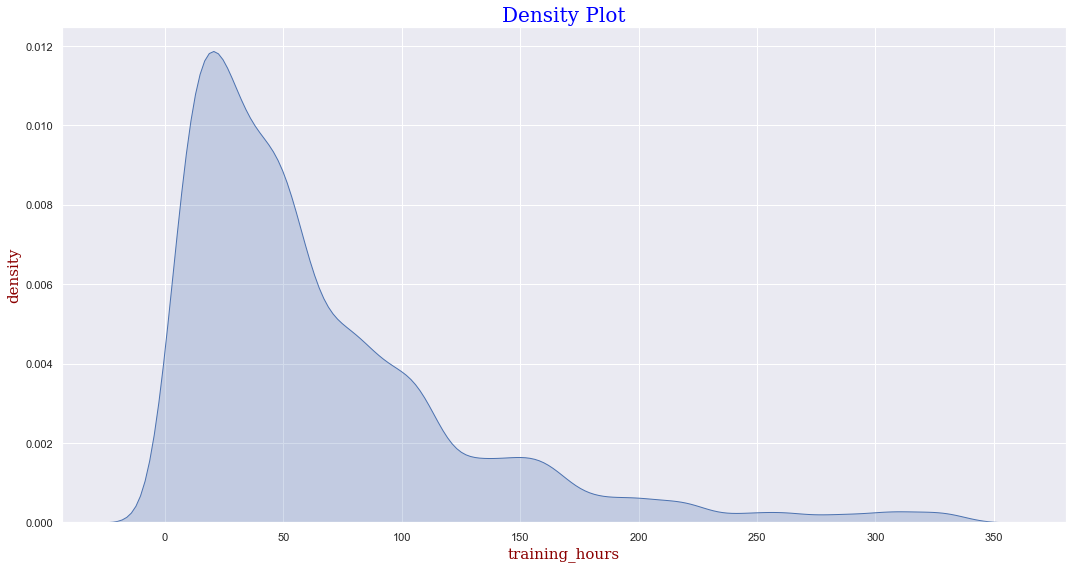

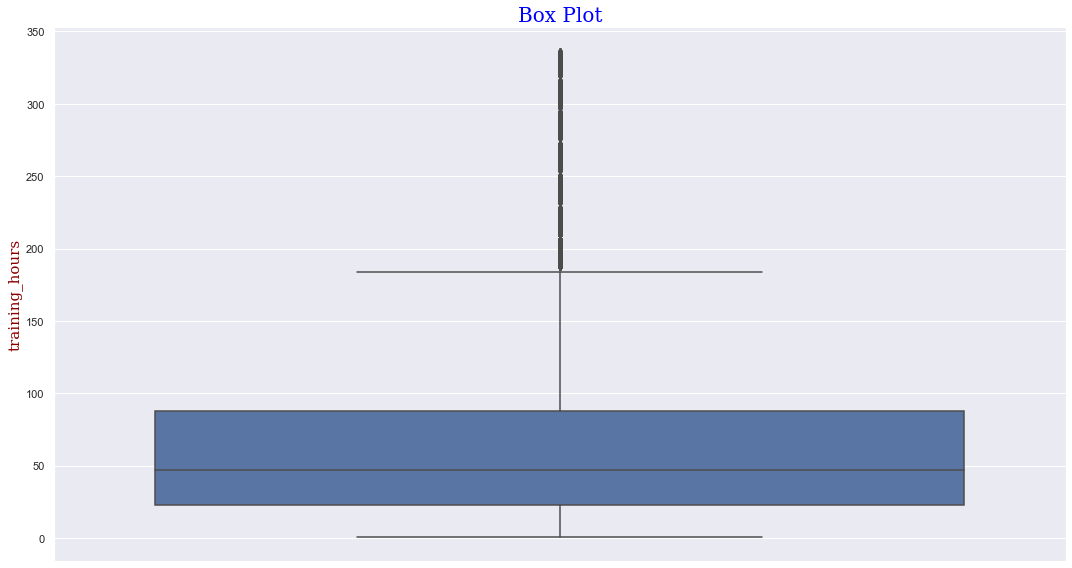

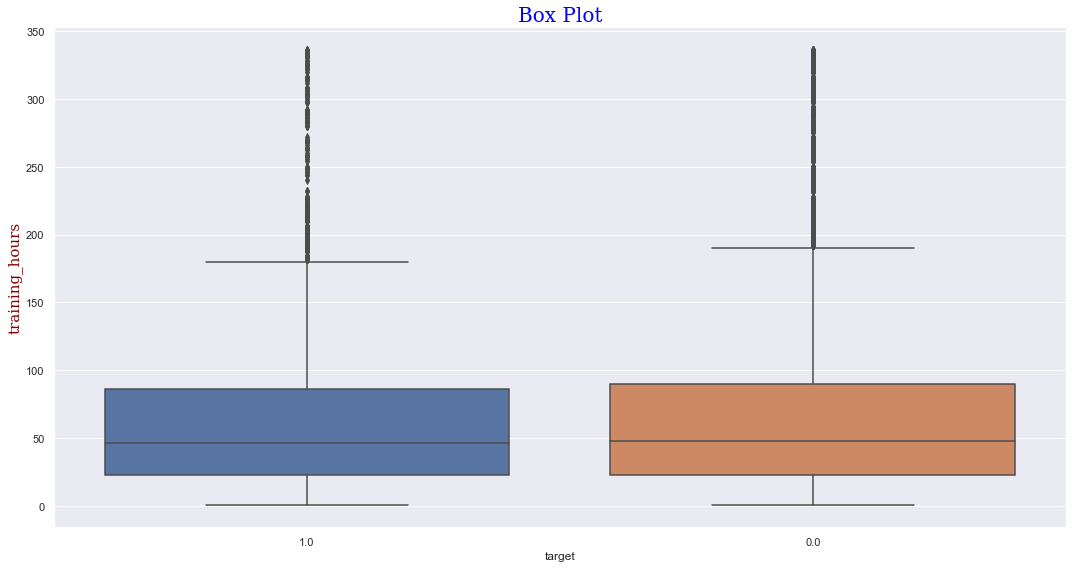

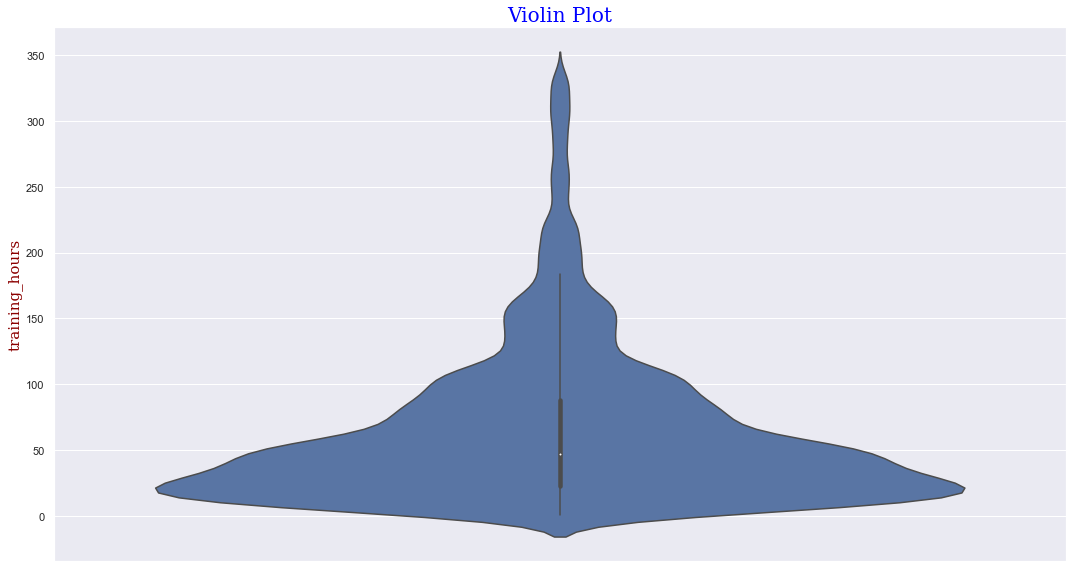

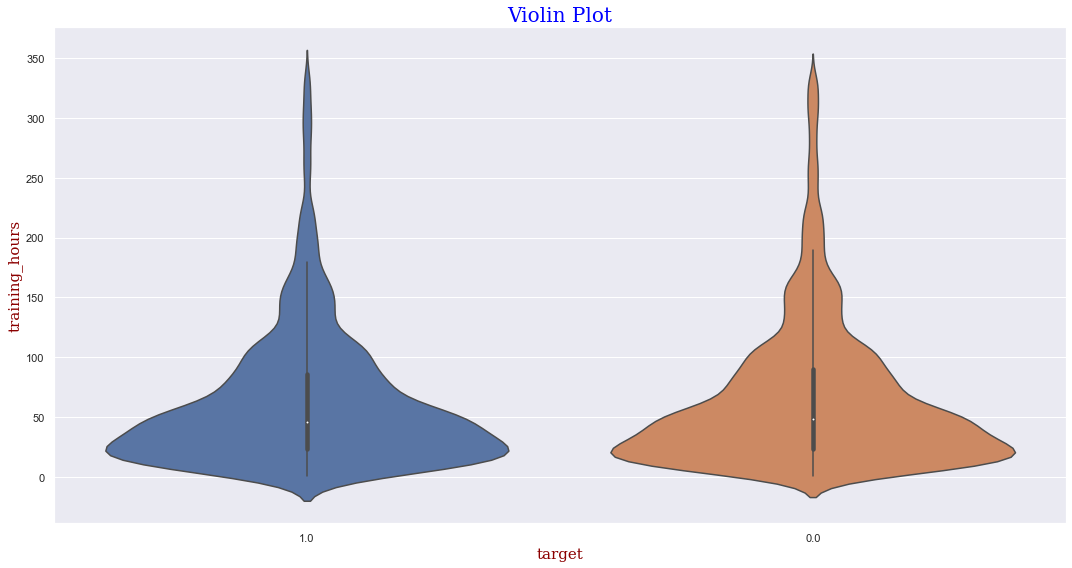

pdf = [0.37905836 0.26980896 0.1512162  0.08163691 0.05564255 0.02077461
 0.01639002 0.00866479 0.00694227 0.00986533]
cdf = [0.37905836 0.64886731 0.80008352 0.88172043 0.93736298 0.95813759
 0.97452761 0.9831924  0.99013467 1.        ]
bin edges = [  1.   34.5  68.  101.5 135.  168.5 202.  235.5 269.  302.5 336. ]





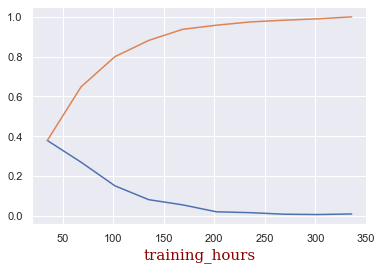

In [7]:
for col in num_variables:
    print(col)
    continuous_explore(df,col,target,hue=True,solo=True,scatter=True,line=True,strip=True,
                swarm=False,histogram=True,density=True,box=True,violin=True,cdf=True)
    print('\n\n')

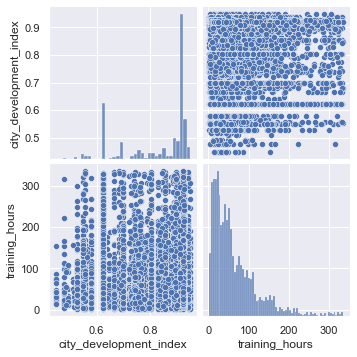

In [8]:
sns.pairplot(df[num_variables])

<AxesSubplot:>

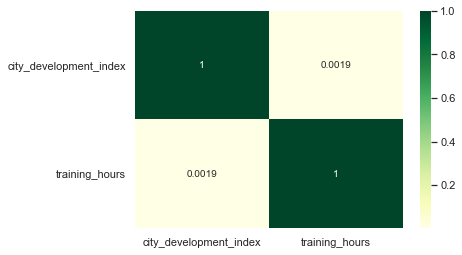

In [9]:
sns.heatmap(df[num_variables].corr(),annot=True,cmap="YlGn")

## Categorical Variables

In [10]:
cat = ['object']
cat_variables = list(df.select_dtypes(include=cat).columns)
print(cat_variables)

['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'target']


In [11]:
df[cat_variables].head()

city gender      relevent_experience enrolled_university  \
0  city_103   Male  Has relevent experience       no_enrollment   
1   city_40   Male   No relevent experience       no_enrollment   
2   city_21    NaN   No relevent experience    Full time course   
3  city_115    NaN   No relevent experience                 NaN   
4  city_162   Male  Has relevent experience       no_enrollment   

  education_level major_discipline experience company_size    company_type  \
0        Graduate             STEM        >20          NaN             NaN   
1        Graduate             STEM         15        50-99         Pvt Ltd   
2        Graduate             STEM          5          NaN             NaN   
3        Graduate  Business Degree         <1          NaN         Pvt Ltd   
4         Masters             STEM        >20        50-99  Funded Startup   

  last_new_job target  
0            1    1.0  
1           >4    0.0  
2        never    0.0  
3        never    1.0  
4            4    0.0

In [12]:
def categorical_explore(df,col,target,hue=True,bar=True,pie=True):
    """
    Categorical data classify items into groups. This type of data can be further 
    broken down into nominal, ordinal, and binary values.
    1. Ordinal values have a set order. An example here could be a ranking of low 
    to high.
    2. Nominal values have no set order. Examples include the Super Hero’s gender
    and alignment.
    3. Binary data has only two values. This could be represented as True/False or 1/0.
    
    Visualisations:
    1. Bar Chart: The bar plot is a univariate data visualization plot on a 
    two-dimensional axis. One axis is the category axis indicating the category, 
    while the second axis is the value axis that shows the numeric value of that 
    category, indicated by the length of the bar.
    
    2. Pie Chart: A pie chart is the most common way used to visualize the numerical
    proportion occupied by each of the categories.
    """
    
    # Distribution
    print('Count Distribution')
    print(df[col].value_counts())
    print('\n Count% Distribution')
    print(df[col].value_counts(True))
    print('\n\n')
    
    if df[col].nunique() < 20:
    
        font1 = {'family':'serif','color':'blue','size':20}
        font2 = {'family':'serif','color':'darkred','size':15}

        # Bar Chart
        if bar == True:
            plt.figure(figsize=(15,8))
            sns.countplot(x=col, data=df)
            plt.title('Bar Chart',fontdict = font1)
            plt.ylabel('count',fontdict = font2)
            plt.xlabel(f'{col}',fontdict = font2)
            plt.xticks(rotation = 90)
            plt.tight_layout()
            plt.show()

        # Frequency with hue
        if bar == True and hue == True:
            plt.figure(figsize=(15,8))
            sns.countplot(x=col, data=df,hue=target)
            plt.title(f'Frequency Table for {col}',fontdict = font1)
            plt.ylabel('count',fontdict = font2)
            plt.xlabel(f'{col}',fontdict = font2)
            plt.xticks(rotation = 90)
            plt.tight_layout()
            plt.show()

        # Pie Chart
        if pie == True:
            plt.figure(figsize=(10,8))
            plt.title("Pie Chart",fontdict = font1)
            plt.pie(df[col].value_counts(),
                    labels=df[col].value_counts().reset_index()['index'].tolist(),
                    shadow=True)
            plt.tight_layout()
            plt.show()
            
        print('\n\n')

city
Count Distribution
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_121       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

 Count% Distribution
city_103    0.227320
city_21     0.141038
city_16     0.080019
city_114    0.069736
city_160    0.044107
              ...   
city_129    0.000157
city_121    0.000157
city_111    0.000157
city_171    0.000052
city_140    0.000052
Name: city, Length: 123, dtype: float64



gender
Count Distribution
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

 Count% Distribution
Male      0.902457
Female    0.084505
Other     0.013038
Name: gender, dtype: float64





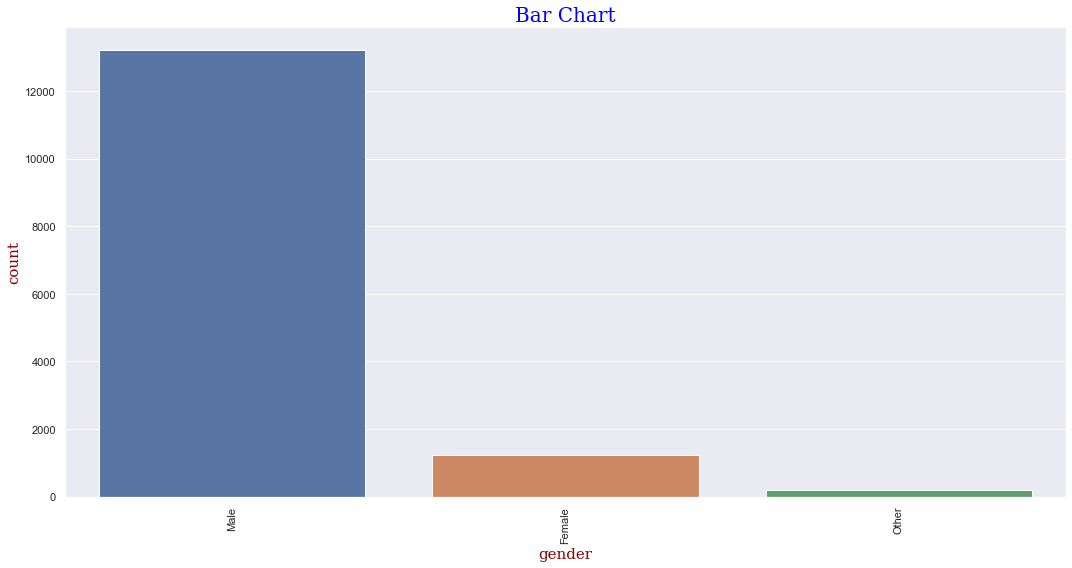

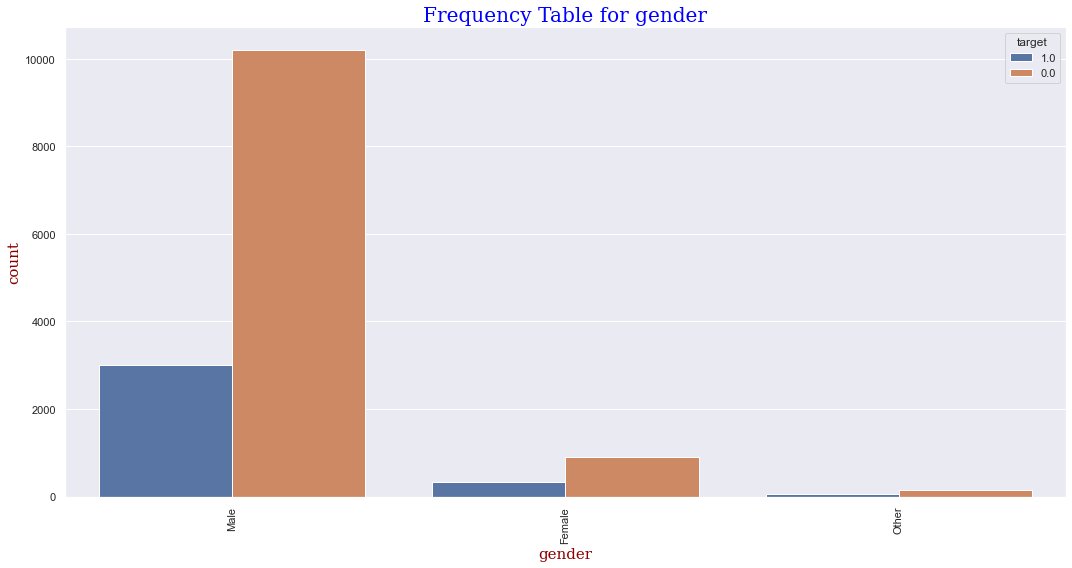

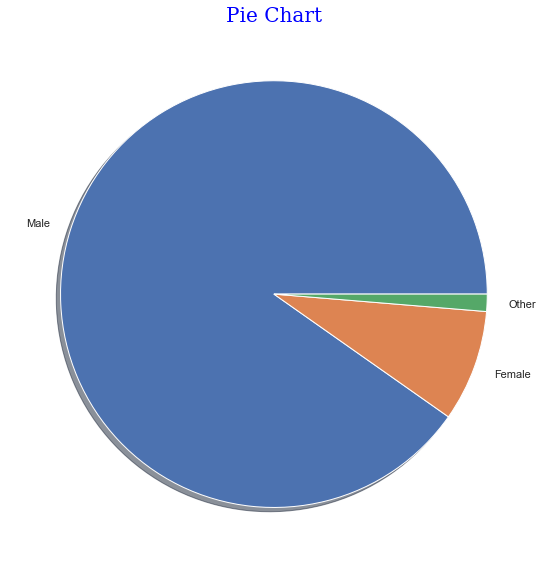




relevent_experience
Count Distribution
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

 Count% Distribution
Has relevent experience    0.719908
No relevent experience     0.280092
Name: relevent_experience, dtype: float64





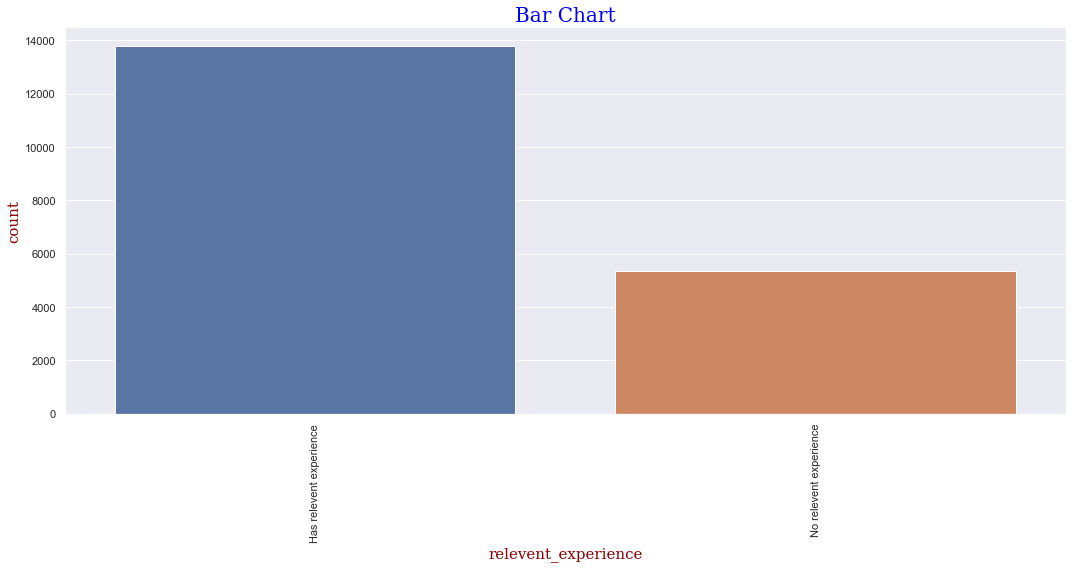

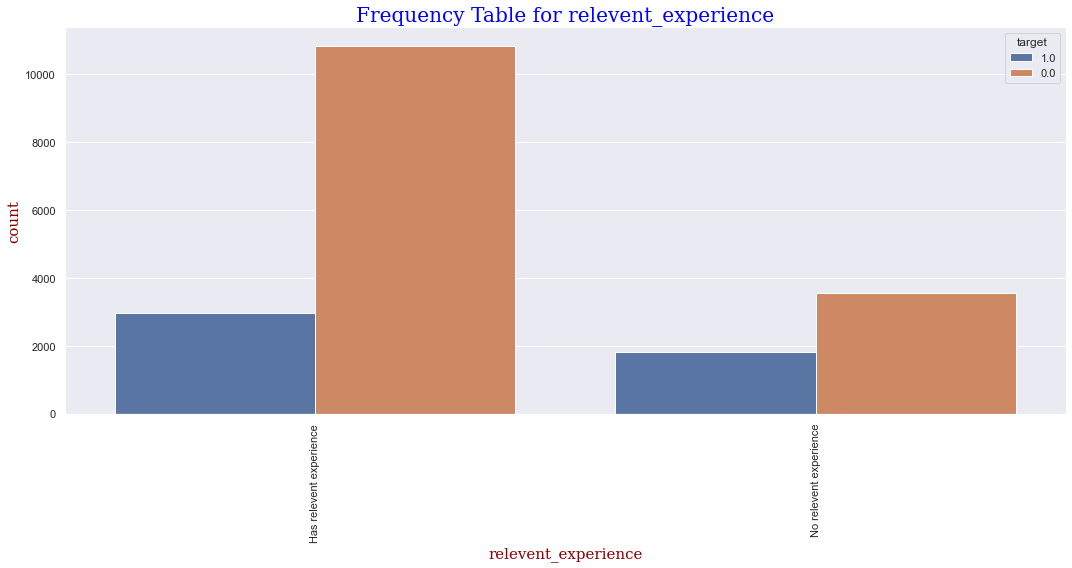

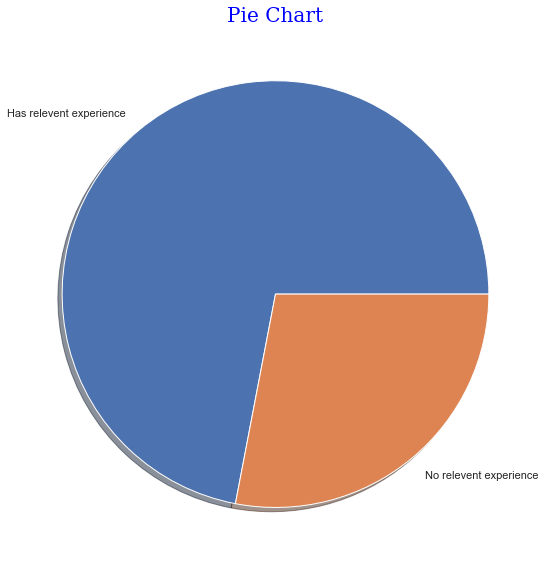




enrolled_university
Count Distribution
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

 Count% Distribution
no_enrollment       0.736043
Full time course    0.200139
Part time course    0.063818
Name: enrolled_university, dtype: float64





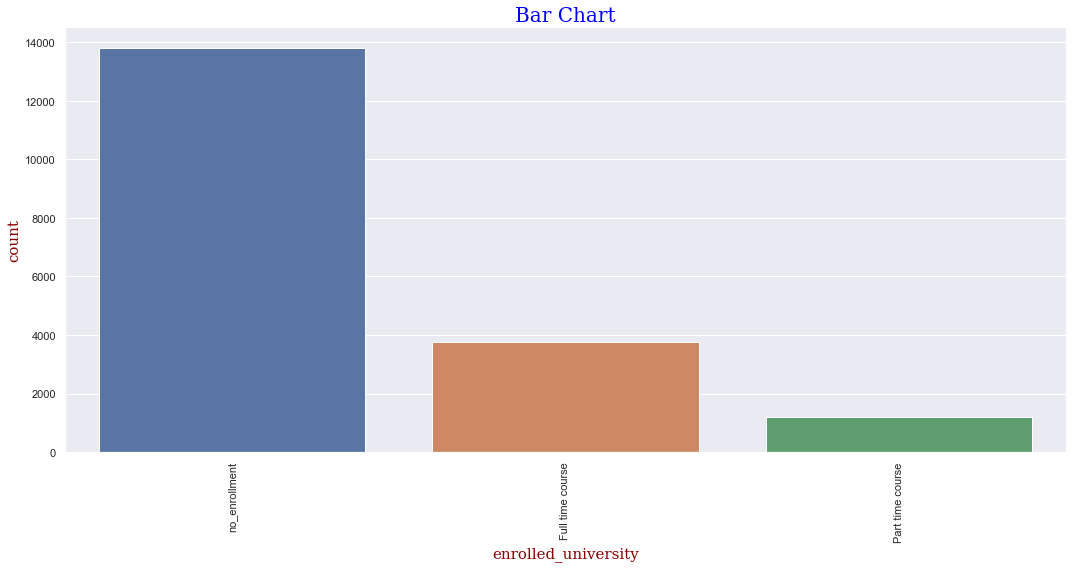

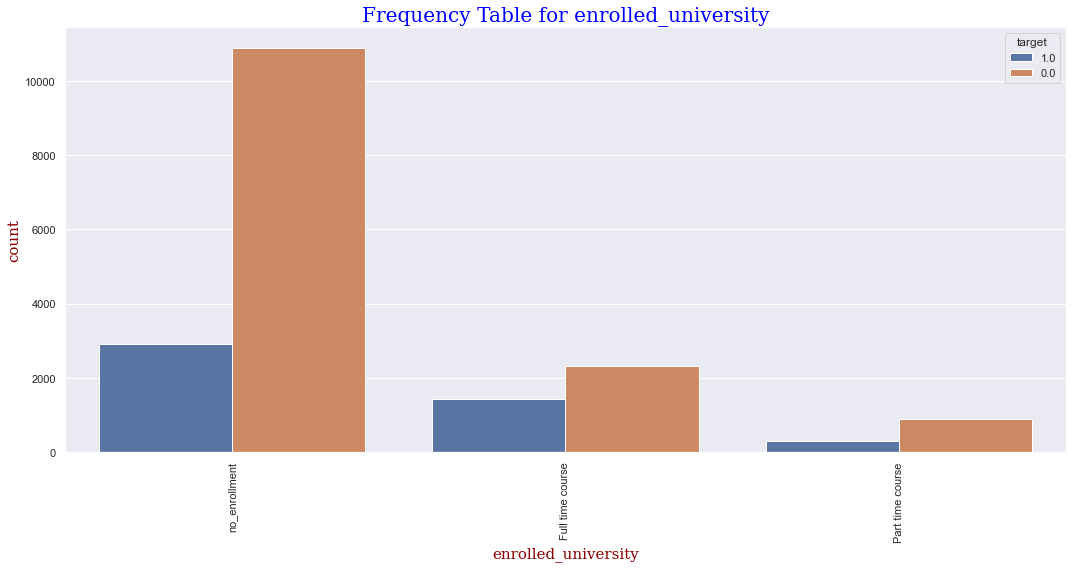

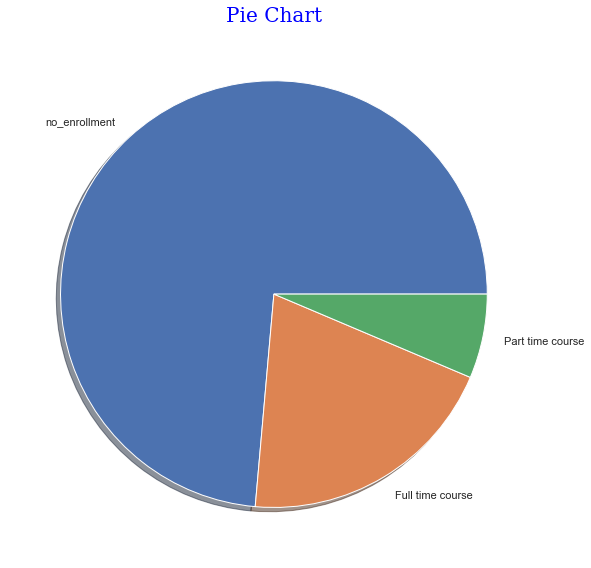




education_level
Count Distribution
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

 Count% Distribution
Graduate          0.620280
Masters           0.233234
High School       0.107872
Phd               0.022141
Primary School    0.016472
Name: education_level, dtype: float64





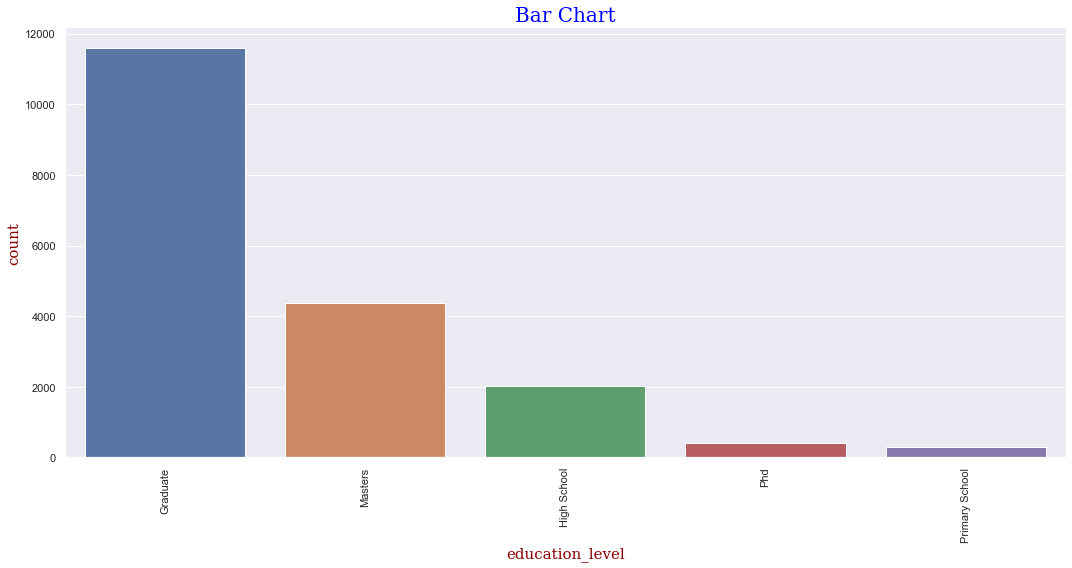

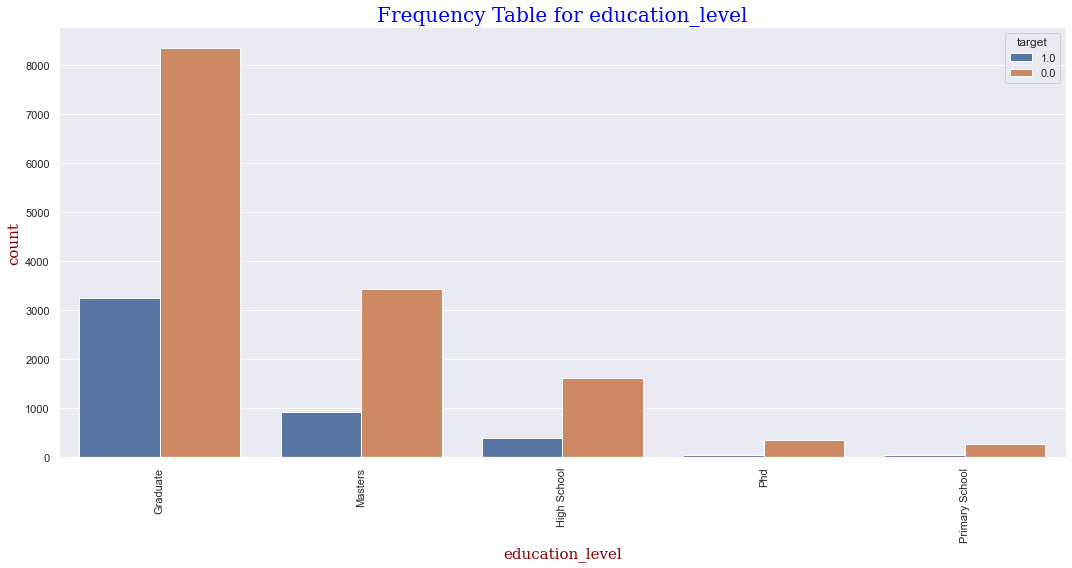

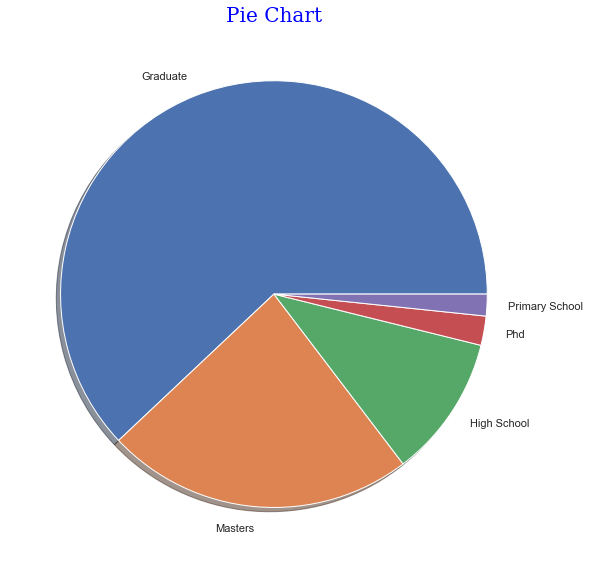




major_discipline
Count Distribution
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

 Count% Distribution
STEM               0.886632
Humanities         0.040930
Other              0.023310
Business Degree    0.020006
Arts               0.015479
No Major           0.013643
Name: major_discipline, dtype: float64





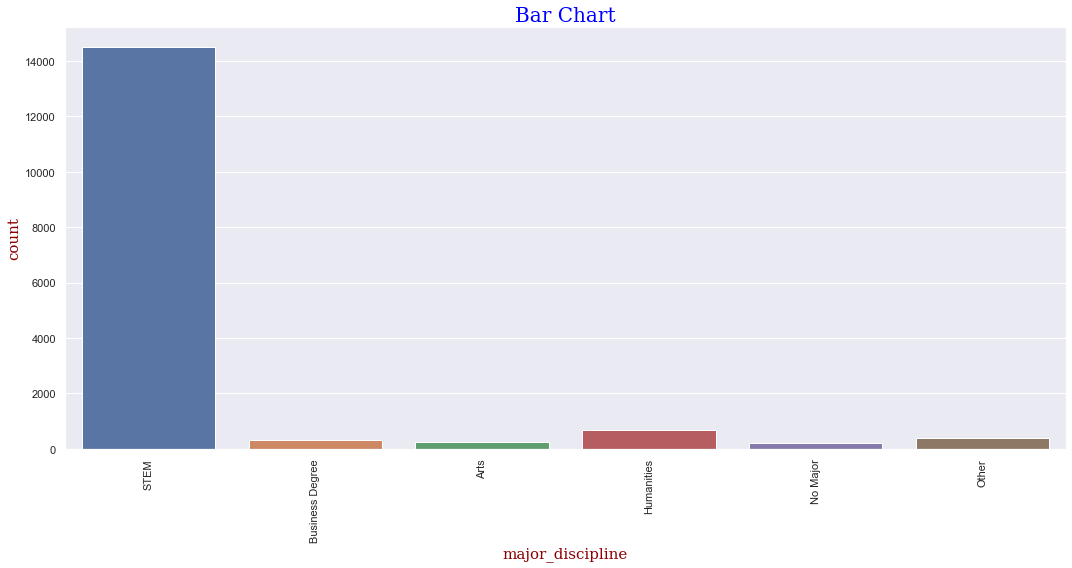

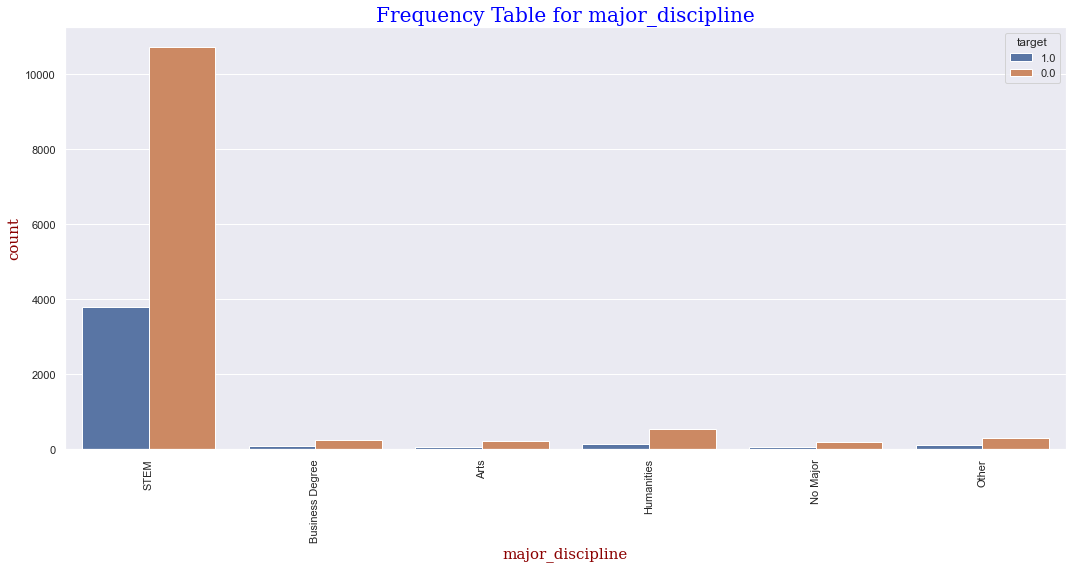

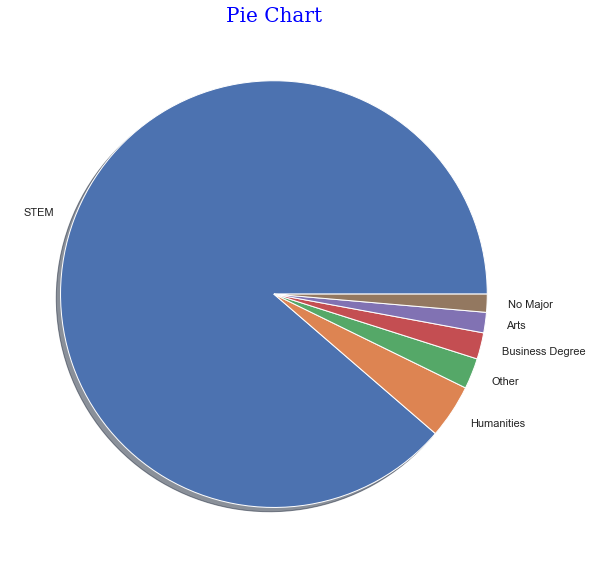




experience
Count Distribution
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

 Count% Distribution
>20    0.172105
5      0.074897
4      0.073482
3      0.070916
6      0.063688
2      0.059027
7      0.053842
10     0.051590
9      0.051328
8      0.042005
15     0.035929
11     0.034777
14     0.030692
1      0.028754
<1     0.027340
16     0.026607
12     0.025873
13     0.020898
17     0.017912
19     0.015922
18     0.014665
20     0.007752
Name: experience, dtype: float64



company_size
Count Distribution
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

 Count% Distribution
50-99        0.233207
100-500  

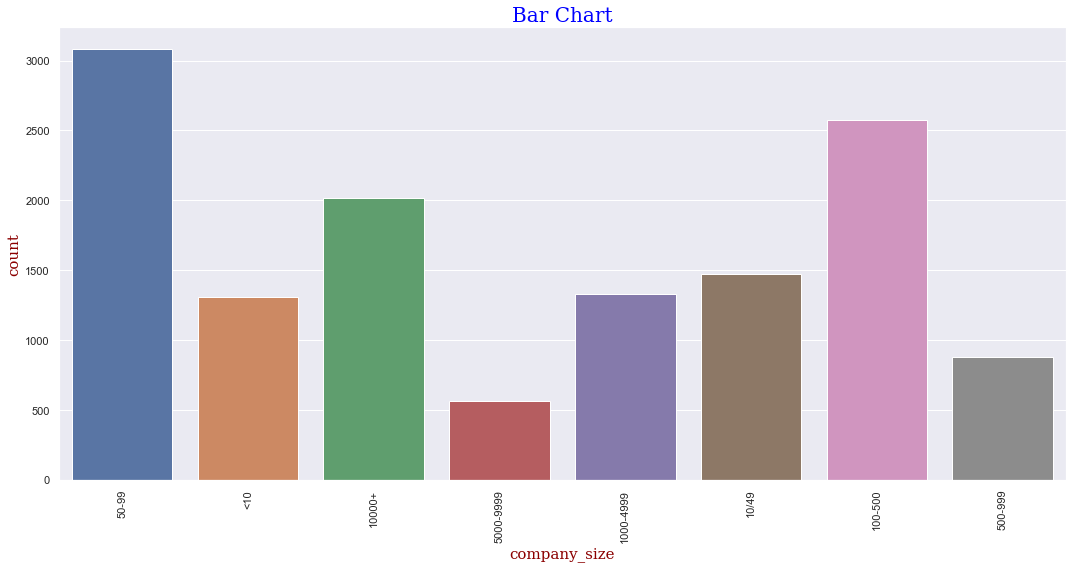

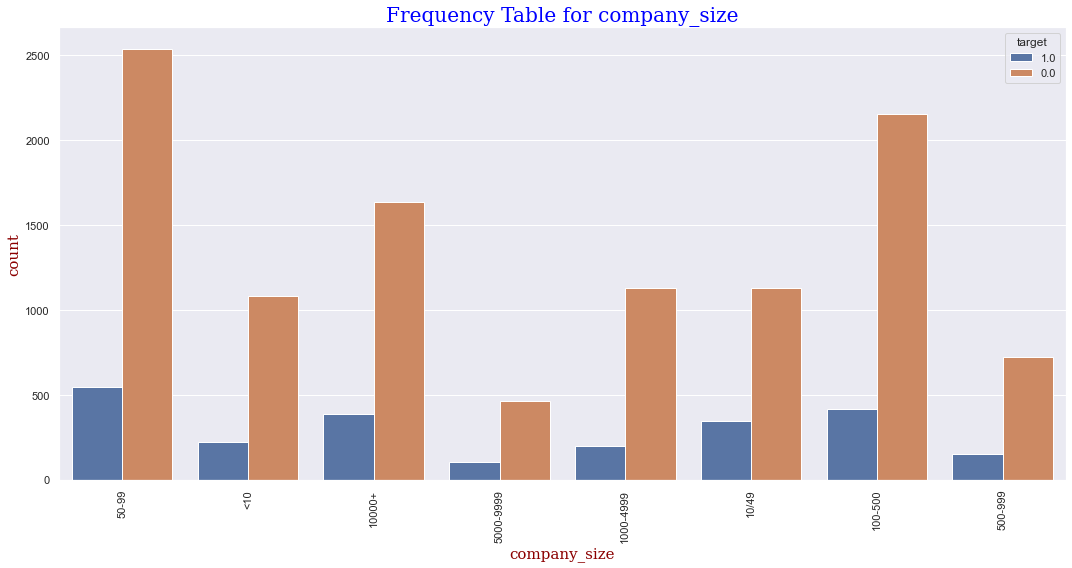

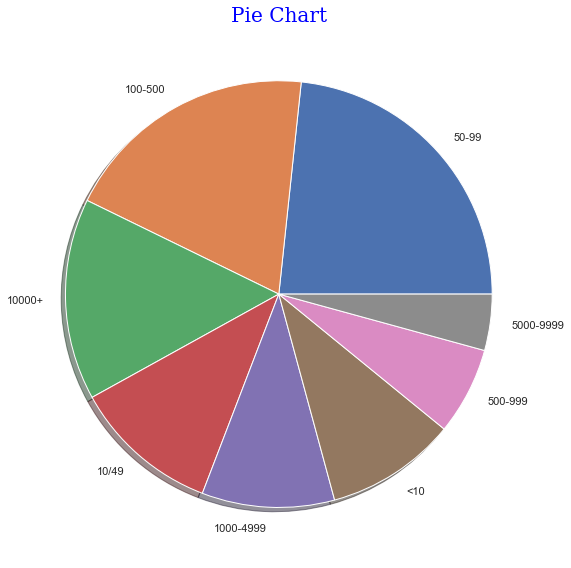




company_type
Count Distribution
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

 Count% Distribution
Pvt Ltd                0.754110
Funded Startup         0.076894
Public Sector          0.073360
Early Stage Startup    0.046320
NGO                    0.040022
Other                  0.009295
Name: company_type, dtype: float64





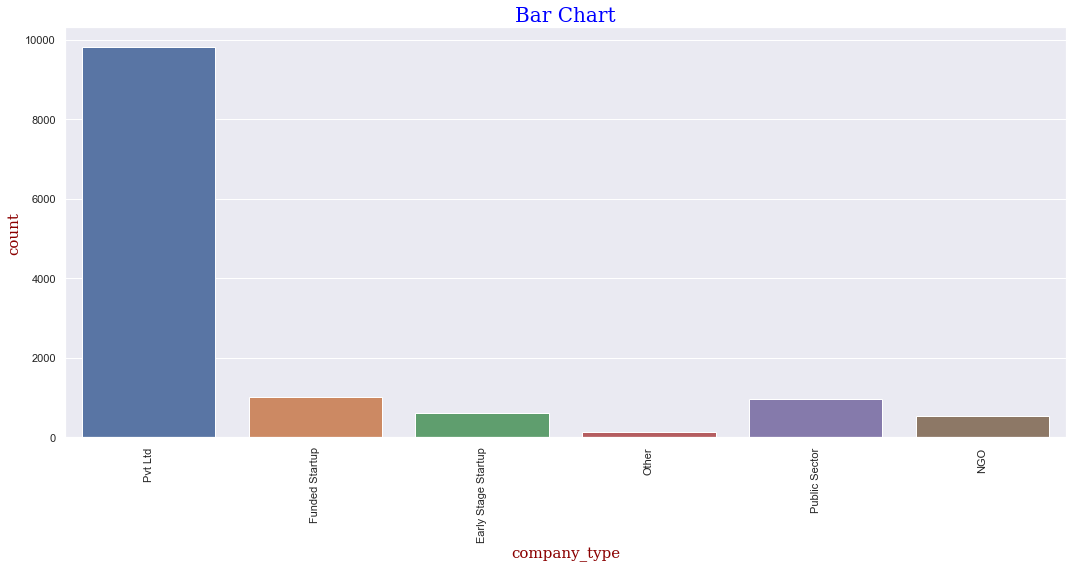

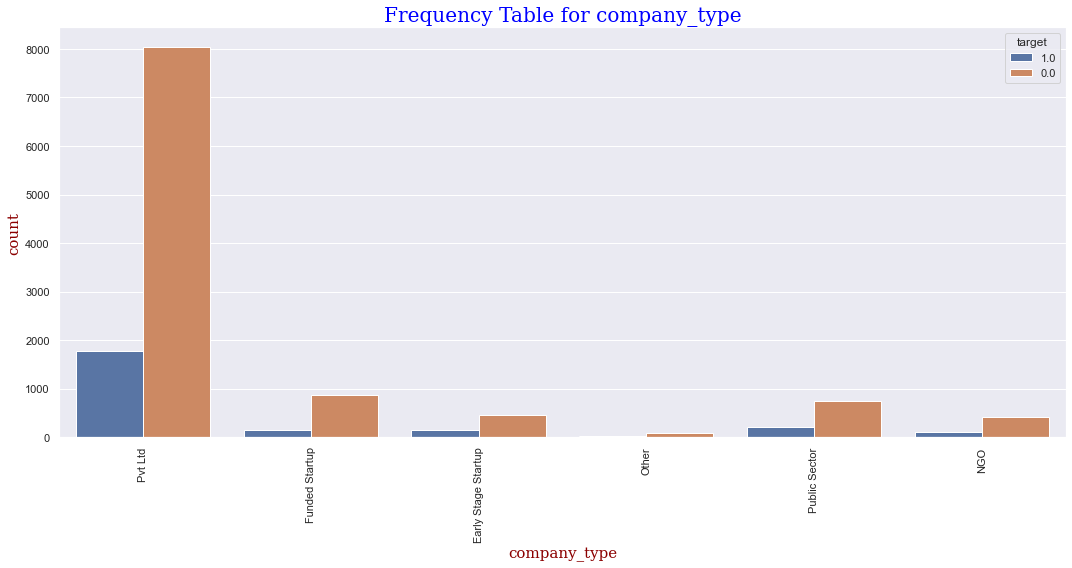

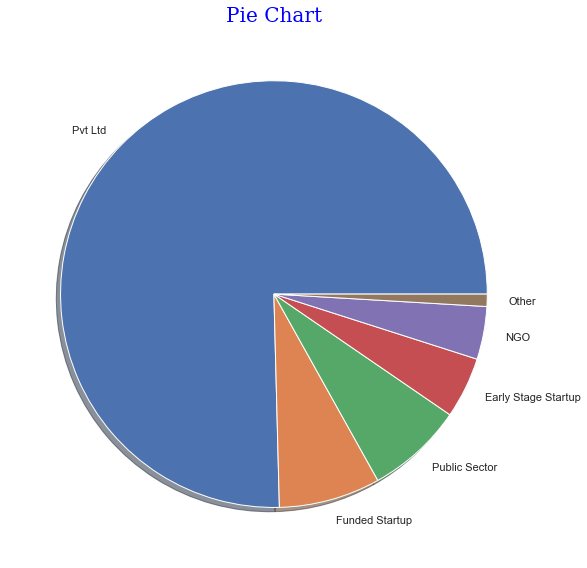




last_new_job
Count Distribution
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

 Count% Distribution
1        0.429143
>4       0.175607
2        0.154790
never    0.130878
4        0.054924
3        0.054657
Name: last_new_job, dtype: float64





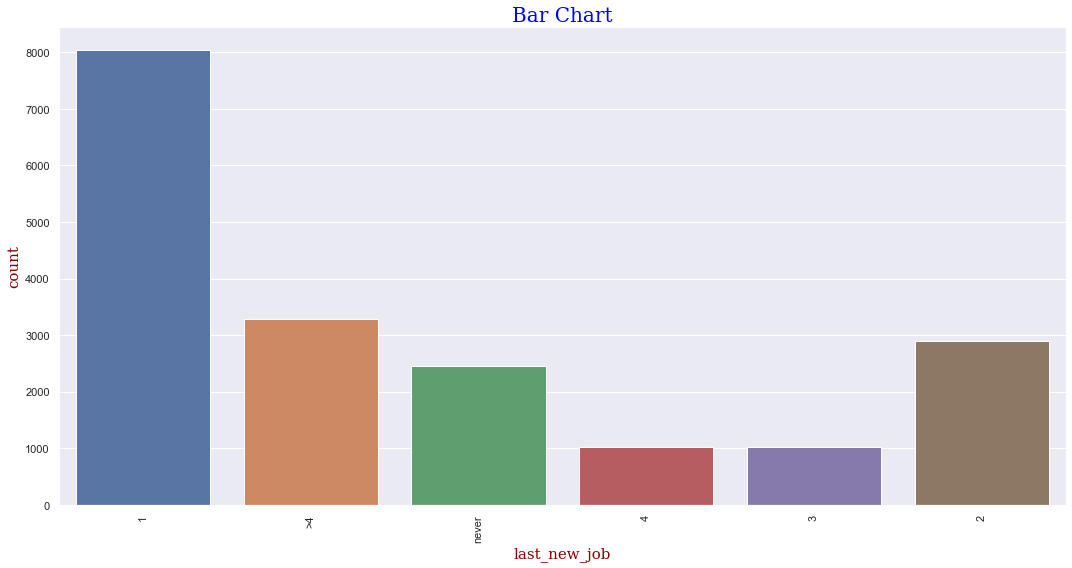

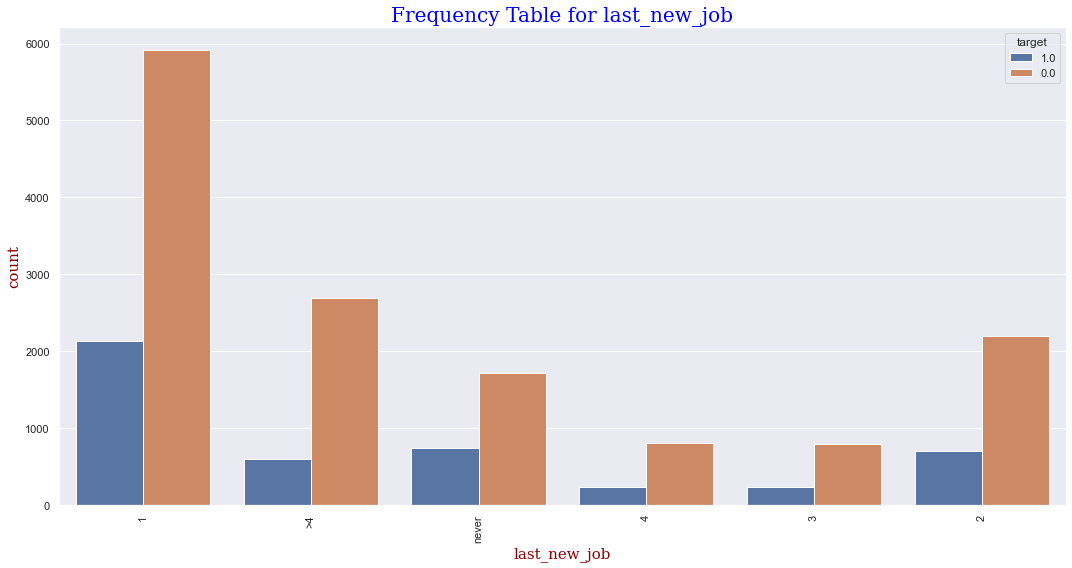

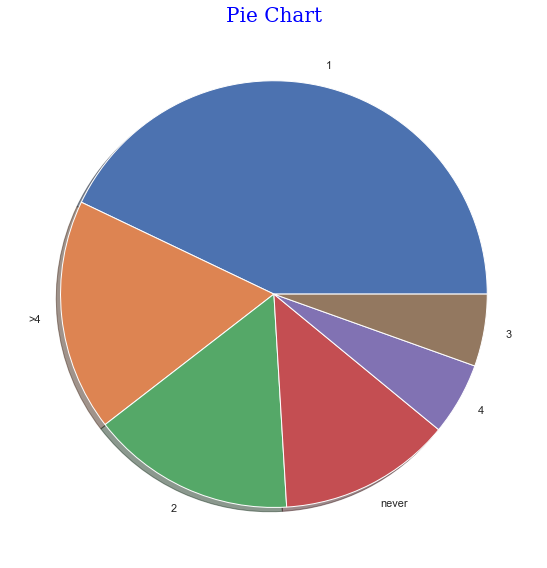

In [13]:
for col in cat_variables:
    if col != target:
        print(col)
        categorical_explore(df,col,target,hue=True,bar=True,pie=True)

In [14]:
def categorical_categorical(df,col,target):
            print(pd.crosstab(df[col],df[target]))
            print('\n')
            print(pd.crosstab(df[col],df[target],normalize='index'))
            print('\n')
            pd.crosstab(df[col],df[target]).plot(kind='bar', stacked=True,
                            figsize=(15,8),title='Stacked Column Chart')
            plt.show()
            pd.crosstab(df[col],df[target],normalize='index').plot(kind='bar', 
                        stacked=True, figsize=(15,8),title='Stacked% Column Chart')
            plt.show()

city
target    0.0  1.0
city              
city_1     23    3
city_10    77    9
city_100  210   65
city_101   32   43
city_102  252   52
...       ...  ...
city_93    21    5
city_94    16   10
city_97    96    8
city_98    71    8
city_99    79   15

[123 rows x 2 columns]


target         0.0       1.0
city                        
city_1    0.884615  0.115385
city_10   0.895349  0.104651
city_100  0.763636  0.236364
city_101  0.426667  0.573333
city_102  0.828947  0.171053
...            ...       ...
city_93   0.807692  0.192308
city_94   0.615385  0.384615
city_97   0.923077  0.076923
city_98   0.898734  0.101266
city_99   0.840426  0.159574

[123 rows x 2 columns]




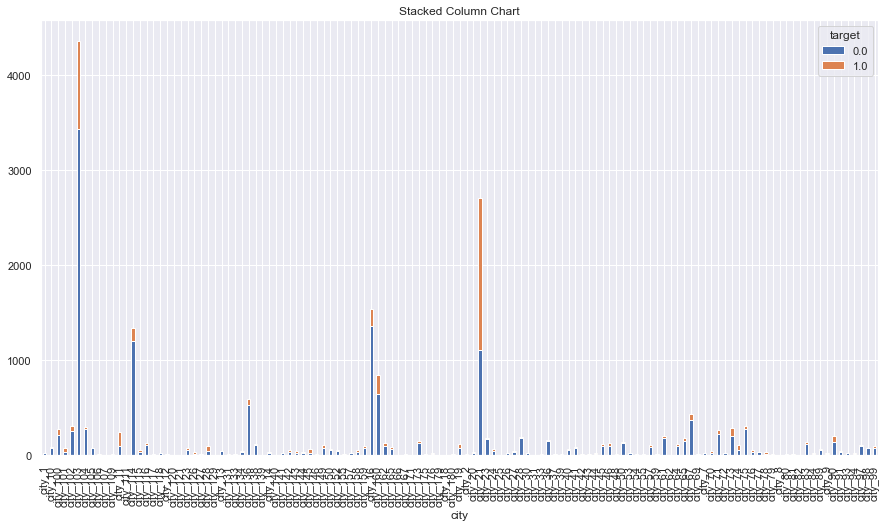

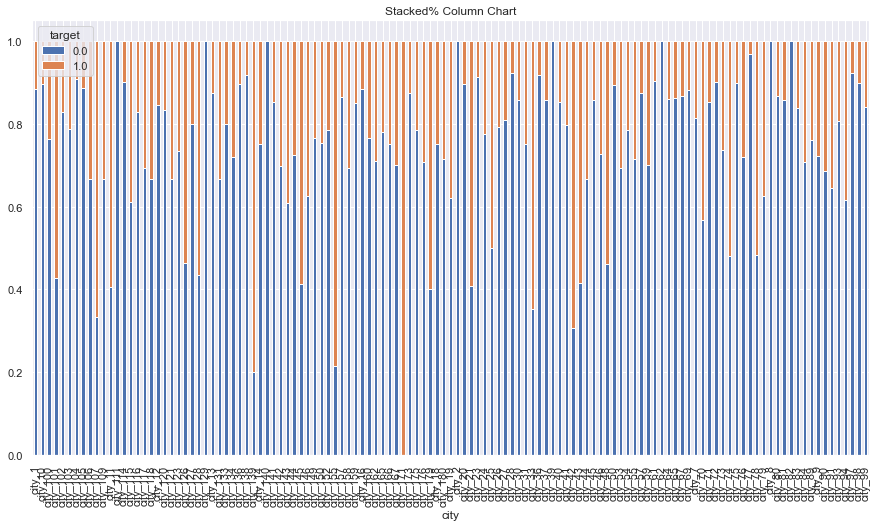

gender
target    0.0   1.0
gender             
Female    912   326
Male    10209  3012
Other     141    50


target       0.0       1.0
gender                    
Female  0.736672  0.263328
Male    0.772181  0.227819
Other   0.738220  0.261780




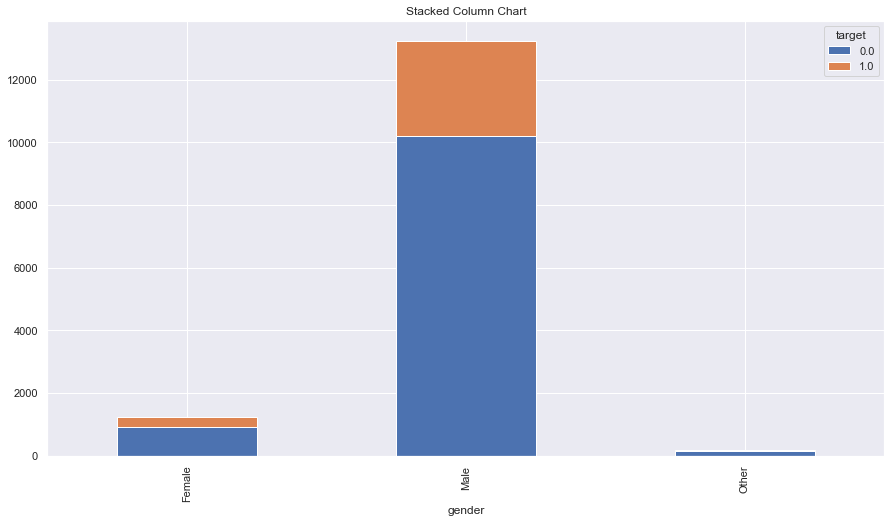

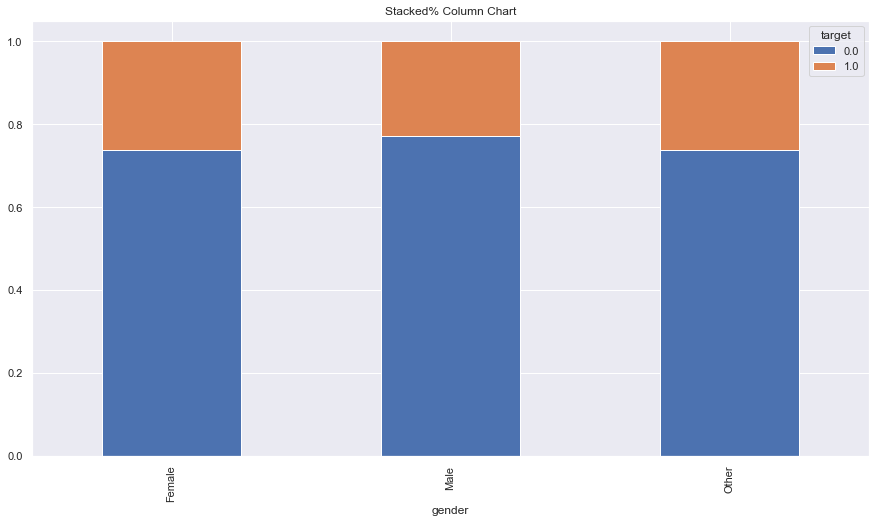

relevent_experience
target                     0.0   1.0
relevent_experience                 
Has relevent experience  10831  2961
No relevent experience    3550  1816


target                        0.0       1.0
relevent_experience                        
Has relevent experience  0.785310  0.214690
No relevent experience   0.661573  0.338427




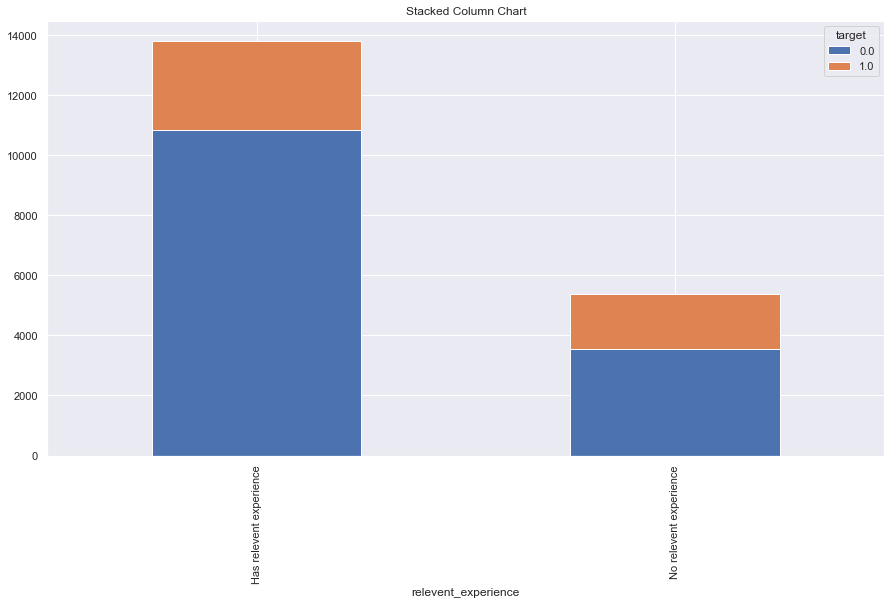

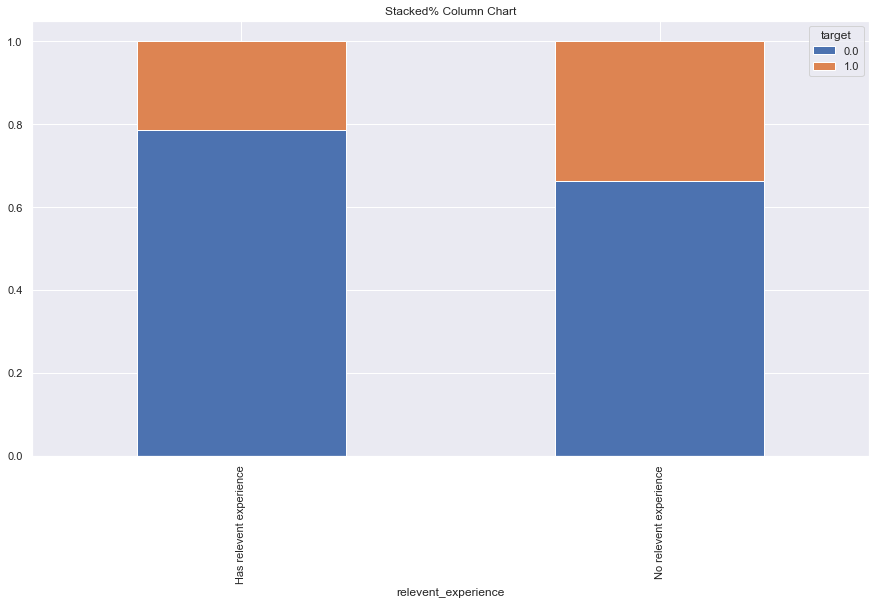

enrolled_university
target                 0.0   1.0
enrolled_university             
Full time course      2326  1431
Part time course       896   302
no_enrollment        10896  2921


target                    0.0       1.0
enrolled_university                    
Full time course     0.619111  0.380889
Part time course     0.747913  0.252087
no_enrollment        0.788594  0.211406




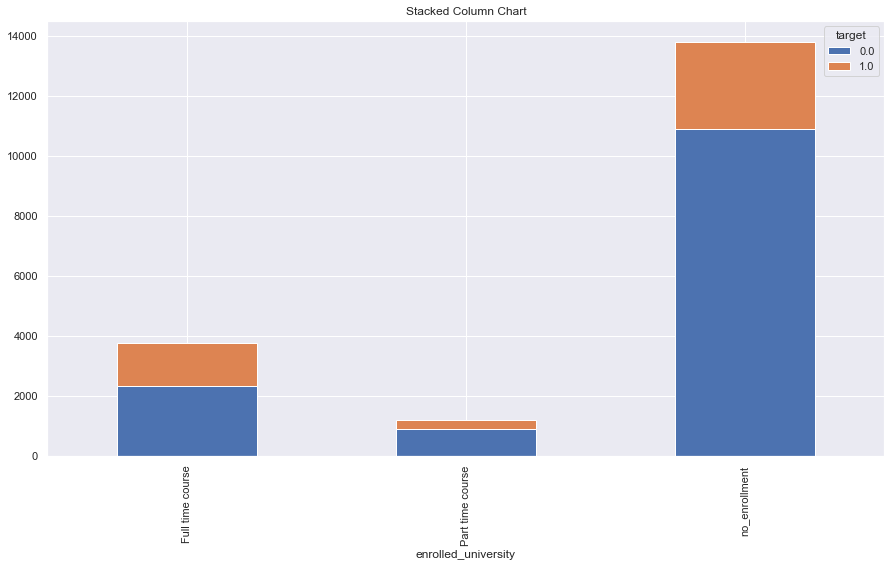

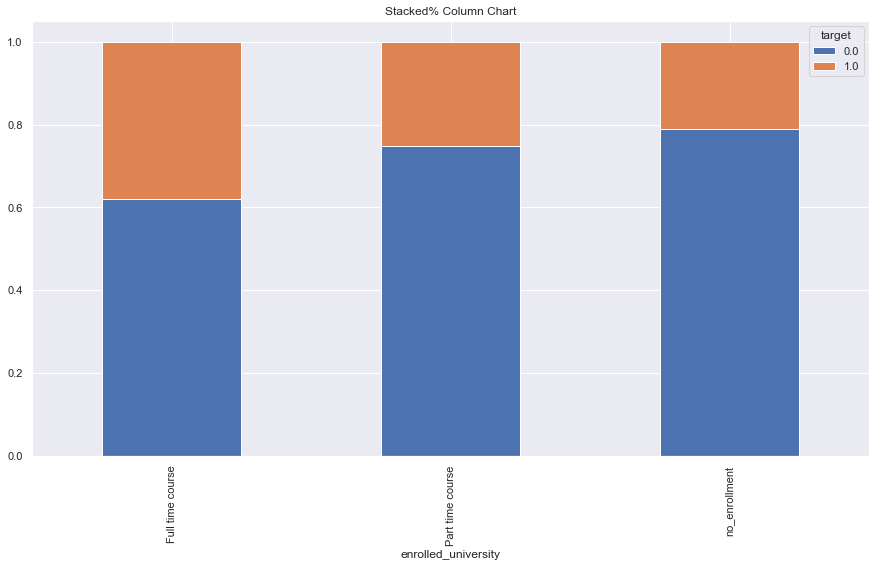

education_level
target            0.0   1.0
education_level            
Graduate         8353  3245
High School      1623   394
Masters          3426   935
Phd               356    58
Primary School    267    41


target                0.0       1.0
education_level                    
Graduate         0.720210  0.279790
High School      0.804660  0.195340
Masters          0.785600  0.214400
Phd              0.859903  0.140097
Primary School   0.866883  0.133117




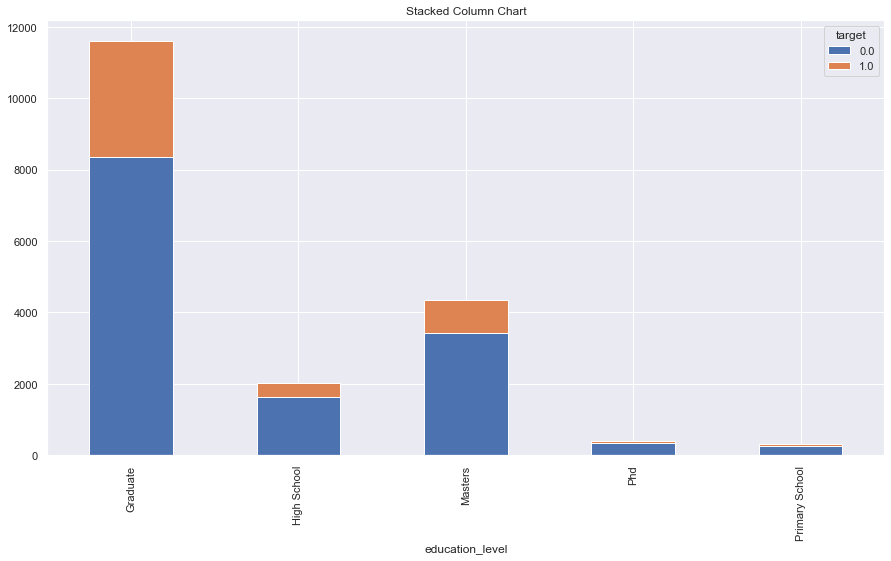

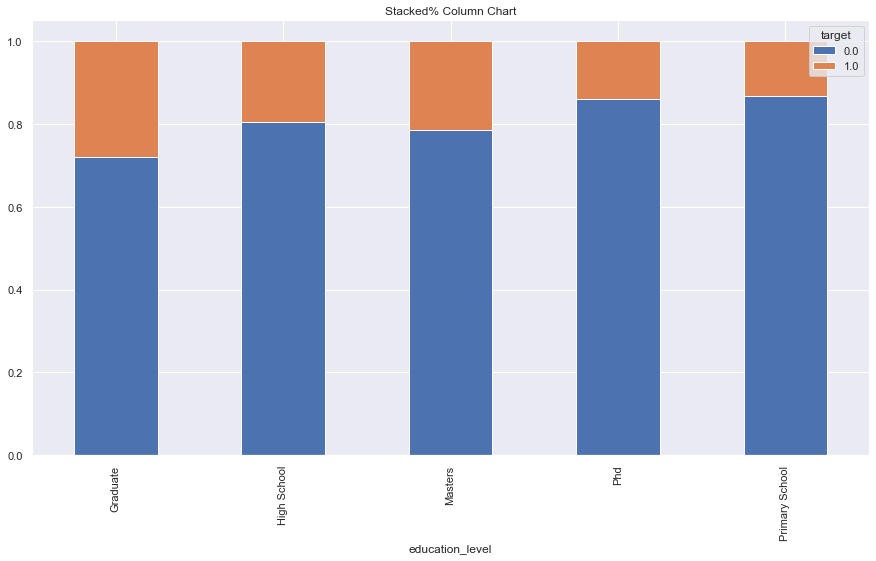

major_discipline
target              0.0   1.0
major_discipline             
Arts                200    53
Business Degree     241    86
Humanities          528   141
No Major            168    55
Other               279   102
STEM              10701  3791


target                 0.0       1.0
major_discipline                    
Arts              0.790514  0.209486
Business Degree   0.737003  0.262997
Humanities        0.789238  0.210762
No Major          0.753363  0.246637
Other             0.732283  0.267717
STEM              0.738407  0.261593




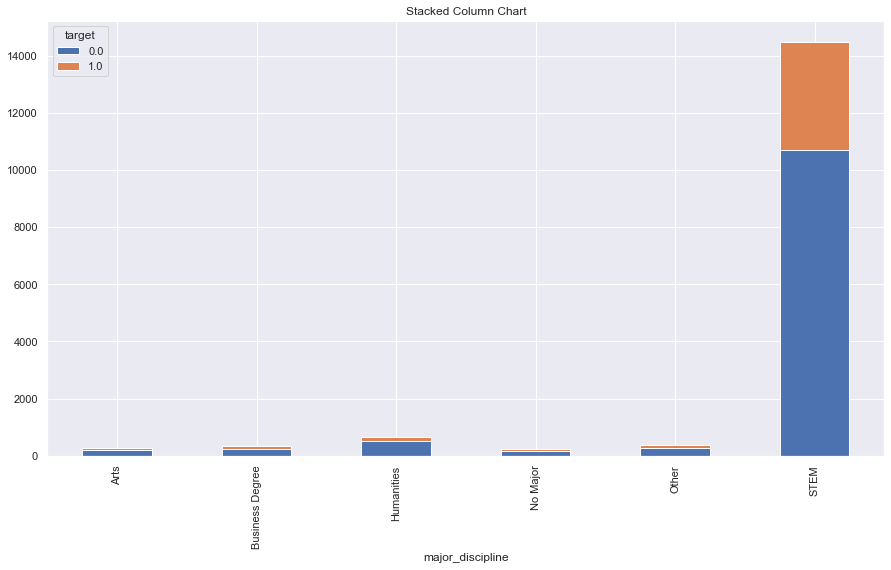

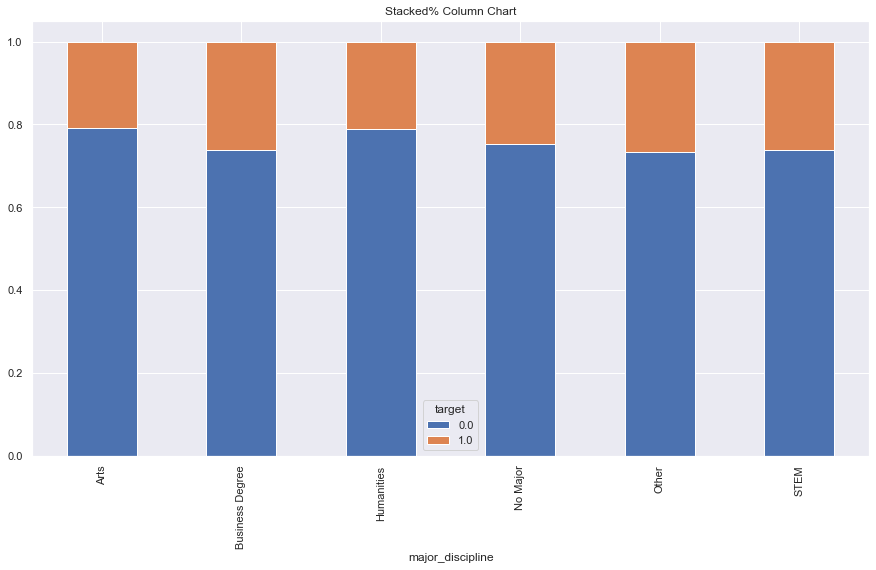

experience
target       0.0  1.0
experience           
1            316  233
10           778  207
11           513  151
12           402   92
13           322   77
14           479  107
15           572  114
16           436   72
17           285   57
18           237   43
19           251   53
2            753  374
20           115   33
3            876  478
4            946  457
5           1018  412
6            873  343
7            725  303
8            607  195
9            767  213
<1           285  237
>20         2783  503


target           0.0       1.0
experience                    
1           0.575592  0.424408
10          0.789848  0.210152
11          0.772590  0.227410
12          0.813765  0.186235
13          0.807018  0.192982
14          0.817406  0.182594
15          0.833819  0.166181
16          0.858268  0.141732
17          0.833333  0.166667
18          0.846429  0.153571
19          0.825658  0.174342
2           0.668146  0.331854
20          0.777027  0.2

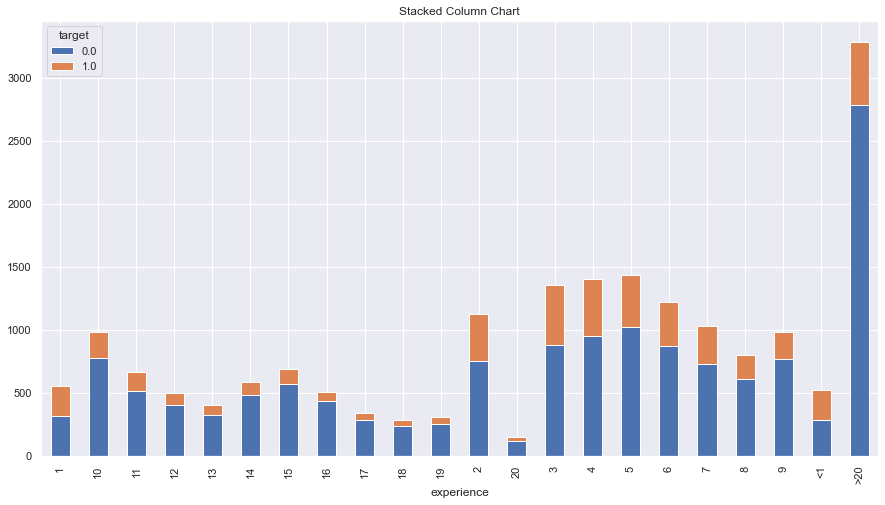

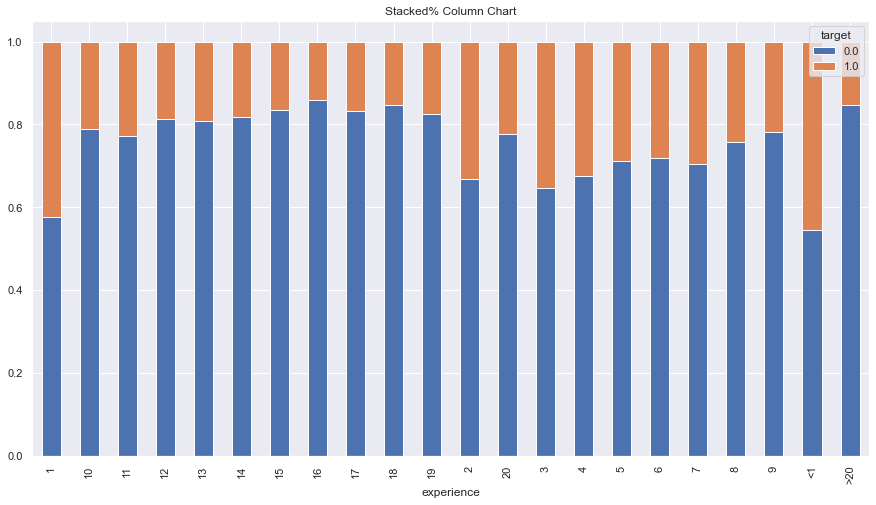

company_size
target         0.0  1.0
company_size           
10/49         1127  344
100-500       2156  415
1000-4999     1128  200
10000+        1634  385
50-99         2538  545
500-999        725  152
5000-9999      461  102
<10           1084  224


target             0.0       1.0
company_size                    
10/49         0.766145  0.233855
100-500       0.838584  0.161416
1000-4999     0.849398  0.150602
10000+        0.809312  0.190688
50-99         0.823224  0.176776
500-999       0.826682  0.173318
5000-9999     0.818828  0.181172
<10           0.828746  0.171254




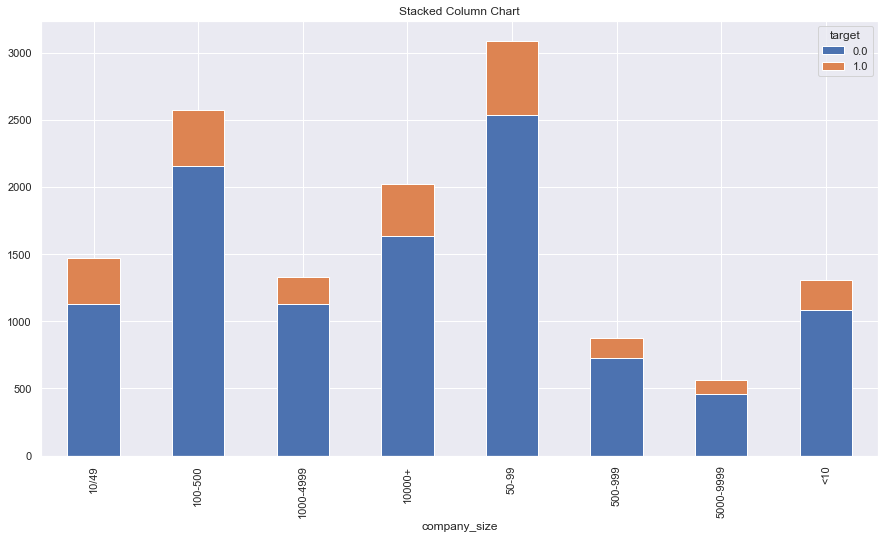

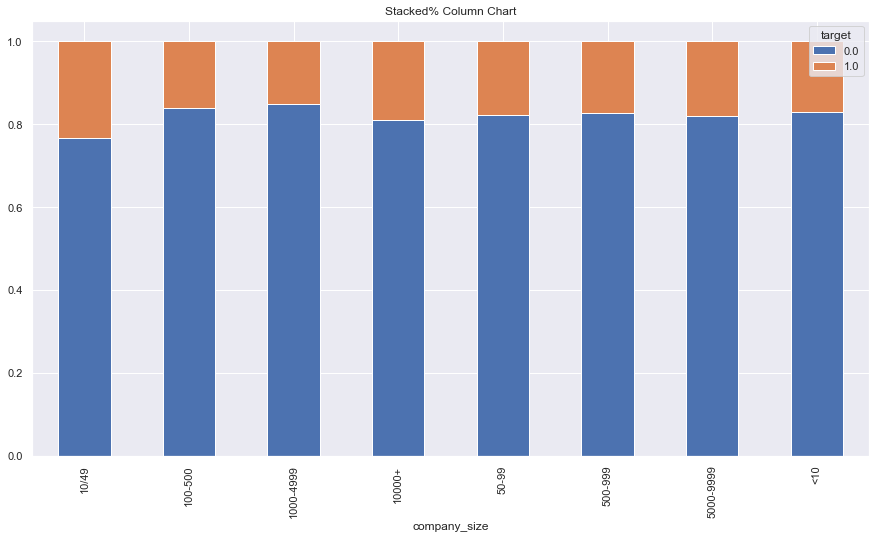

company_type
target                0.0   1.0
company_type                   
Early Stage Startup   461   142
Funded Startup        861   140
NGO                   424    97
Other                  92    29
Public Sector         745   210
Pvt Ltd              8042  1775


target                    0.0       1.0
company_type                           
Early Stage Startup  0.764511  0.235489
Funded Startup       0.860140  0.139860
NGO                  0.813820  0.186180
Other                0.760331  0.239669
Public Sector        0.780105  0.219895
Pvt Ltd              0.819191  0.180809




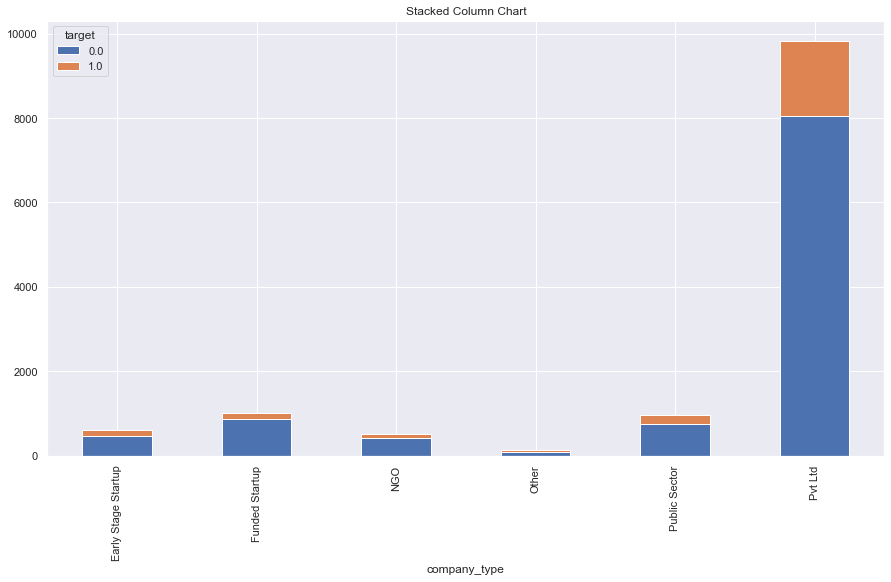

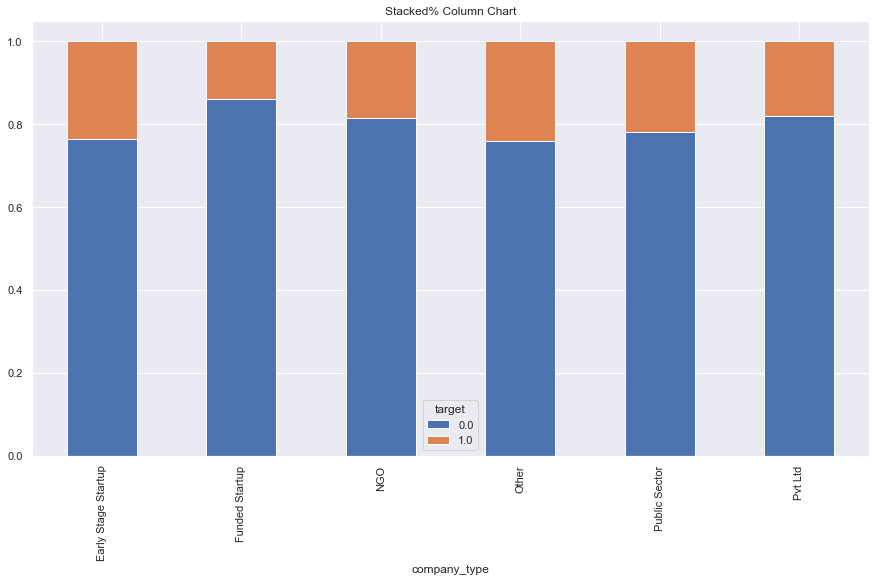

last_new_job
target         0.0   1.0
last_new_job            
1             5915  2125
2             2200   700
3              793   231
4              801   228
>4            2690   600
never         1713   739


target             0.0       1.0
last_new_job                    
1             0.735697  0.264303
2             0.758621  0.241379
3             0.774414  0.225586
4             0.778426  0.221574
>4            0.817629  0.182371
never         0.698613  0.301387




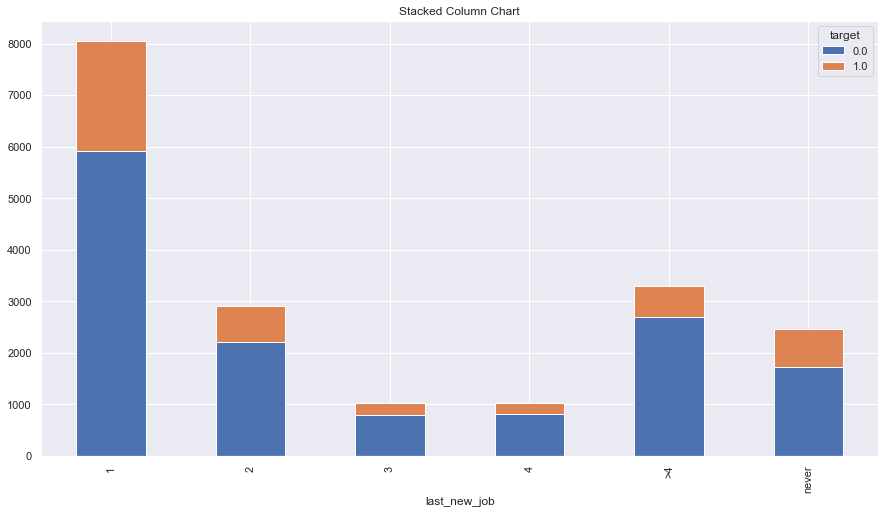

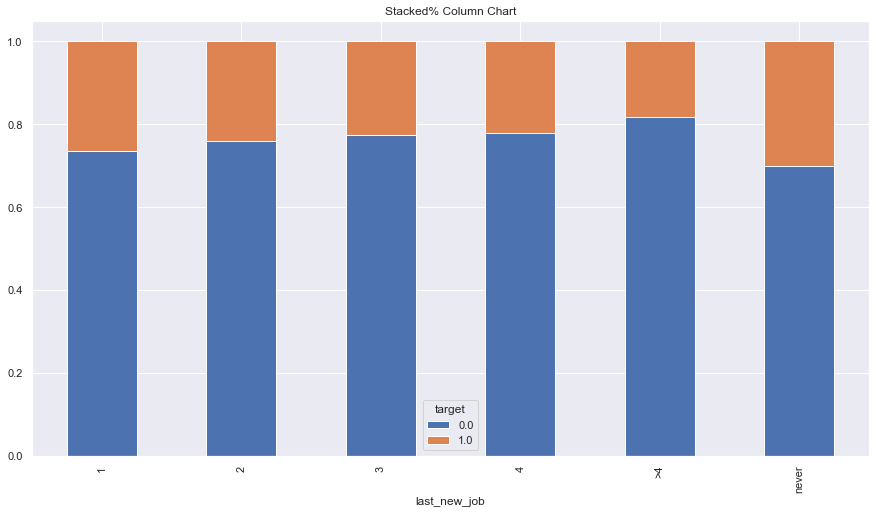

In [15]:
for col in cat_variables:
    if col != target:
        print(col)
        categorical_categorical(df,col,target)

## Observation from Visualisations

In [16]:
df_original = df.copy()

## Final Touches Before Modeliing Cycle

In [17]:
df = df_original.copy()

In [18]:
print(df.shape)
print(df.enrollee_id.nunique())

(19158, 14)
19158


In [19]:
cat_variables.remove('target')
df.drop(['enrollee_id'],1,inplace=True)

In [20]:
df_original_before_imp = df.copy()

In [21]:
df.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [22]:
print(df[target].value_counts())
print(df[target].value_counts(True))

0.0    14381
1.0     4777
Name: target, dtype: int64
0.0    0.750652
1.0    0.249348
Name: target, dtype: float64


# Missing Data Imputation

## Case 1: Simple Imputer Technique

In [62]:
df = df_original_before_imp.copy()

### Train Test Split

In [63]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(14368, 12)
(4790, 12)
(14368,)
(4790,)
0.0    0.750626
1.0    0.249374
Name: target, dtype: float64
0.0    0.750731
1.0    0.249269
Name: target, dtype: float64


### Outlier Detection

In [64]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01,novelty=True)
clf.fit(X_train[num_variables])
X_train['outlier'] = clf.predict(X_train[num_variables])
X_test['outlier'] = clf.predict(X_test[num_variables])
print(X_train['outlier'].value_counts())
print(X_test['outlier'].value_counts())

 1    14259
-1      109
Name: outlier, dtype: int64
 1    4758
-1      32
Name: outlier, dtype: int64


In [65]:
for col in num_variables:
    X_train[col] = list(map(lambda x,y: np.nan if y == -1 else x,X_train[col],X_train['outlier']))
    X_test[col] = list(map(lambda x,y: np.nan if y == -1 else x,X_test[col],X_test['outlier']))
X_train.drop(['outlier'],1,inplace=True)
X_test.drop(['outlier'],1,inplace=True)

print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                         0
city_development_index     109
gender                    3351
relevent_experience          0
enrolled_university        292
education_level            345
major_discipline          2127
experience                  48
company_size              4420
company_type              4590
last_new_job               318
training_hours             109
dtype: int64


city                         0
city_development_index      32
gender                    1157
relevent_experience          0
enrolled_university         94
education_level            115
major_discipline           686
experience                  17
company_size              1518
company_type              1550
last_new_job               105
training_hours              32
dtype: int64


### Handling Categorical Data

In [90]:
X_train[col].head(100)

354      never
11526       >4
4025         1
2441         2
12537    never
         ...  
1804       NaN
14329        3
2917         1
1175         1
1940         4
Name: last_new_job, Length: 100, dtype: object

In [96]:
X_temp = pd.concat([X_train,X_test])
for col in cat_variables:
    if col != target:
        l1 = X_temp[col].value_counts().reset_index().sort_values('index')['index'].tolist()
        l2 = list(range(len(l1)))
        l = {l1[i]: l2[i] for i in range(len(l1))}
        X_train[col].replace(l,inplace=True)
        X_test[col].replace(l,inplace=True)

In [97]:
from sklearn.preprocessing import LabelEncoder
lcoder = LabelEncoder()
y_train= lcoder.fit_transform(y_train)
y_test= lcoder.transform(y_test)

### Missing Values Handling: Simple Imputer

In [99]:
print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                         0
city_development_index     109
gender                    3351
relevent_experience          0
enrolled_university        292
education_level            345
major_discipline          2127
experience                  48
company_size              4420
company_type              4590
last_new_job               318
training_hours             109
dtype: int64


city                         0
city_development_index      32
gender                    1157
relevent_experience          0
enrolled_university         94
education_level            115
major_discipline           686
experience                  17
company_size              1518
company_type              1550
last_new_job               105
training_hours              32
dtype: int64


In [100]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X_train_imp = imp.fit_transform(X_train[cat_variables])
X_test_imp = imp.transform(X_test[cat_variables])
imp1 = SimpleImputer(missing_values=np.nan,strategy='mean')
X_train_imp1 = imp1.fit_transform(X_train[num_variables])
X_test_imp1 = imp1.transform(X_test[num_variables])
X_train = pd.merge(pd.DataFrame(X_train_imp,columns=cat_variables),pd.DataFrame(X_train_imp1,columns=num_variables),'inner',left_index=True,right_index=True)
X_test = pd.merge(pd.DataFrame(X_test_imp,columns=cat_variables),pd.DataFrame(X_test_imp1,columns=num_variables),'inner',left_index=True,right_index=True)
print(X_train.shape)
print(X_test.shape)

(14368, 12)
(4790, 12)


In [101]:
print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                      0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
city_development_index    0
training_hours            0
dtype: int64


city                      0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
city_development_index    0
training_hours            0
dtype: int64


In [102]:
# from sklearn.preprocessing import LabelEncoder
# lcoder1 = LabelEncoder()
# for col in cat_variables:
#     if col != target:
#         lcoder1.fit(X_train[col])
#         try:
#             X_test.loc[:,col]= lcoder1.transform(X_test[col])
#             X_train.loc[:,col]= lcoder1.transform(X_train[col])          
#         except:
#             print(f'X_test[{col}] contains previously unseen labels:')
#             X_temp = pd.concat([X_train,X_test])
#             lcoder1.fit(X_temp[col])
#             X_train.loc[:,col]= lcoder1.transform(X_train[col])
#             X_test.loc[:,col]= lcoder1.transform(X_test[col])
        
# lcoder2 = LabelEncoder()
# y_train= lcoder2.fit_transform(y_train)
# y_test= lcoder2.transform(y_test)

### Scaling data

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<AxesSubplot:>

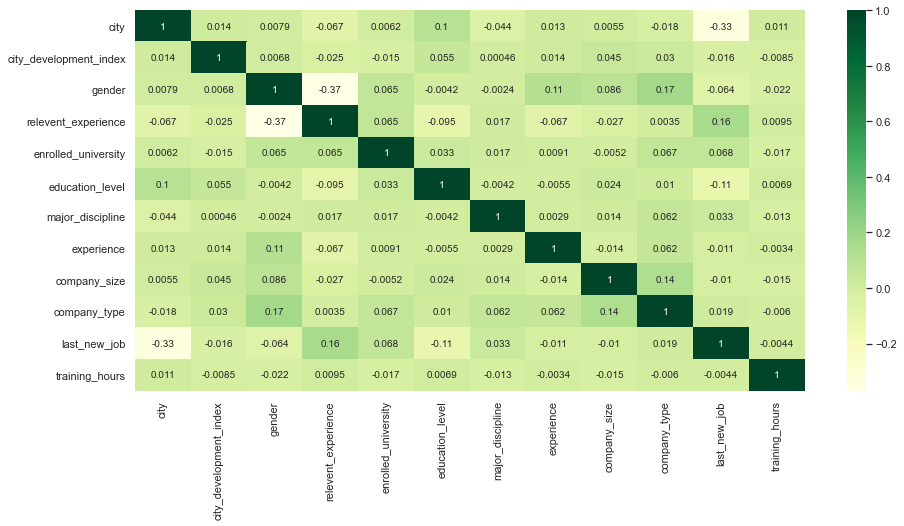

In [107]:
plt.figure(figsize=(15,7))
sns.heatmap(pd.DataFrame(X_train,columns=X_temp.columns).corr(), annot=True,cmap='YlGn')

### Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.7353067512316486 (0.013147939991124494)


In [109]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

[1.40244161]
[[-0.50756806 -0.24961896  0.49068155 -0.3590391  -0.77175702 -0.24354541
   0.00653756  0.31334782  0.54991942 -0.23454587 -3.11018362 -0.22063629]]
Confusion Matrix Training
[[10101   684]
 [ 2709   874]]
Confusion Matrix Testing
[[3380  216]
 [ 875  319]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     10785
           1       0.56      0.24      0.34      3583

    accuracy                           0.76     14368
   macro avg       0.67      0.59      0.60     14368
weighted avg       0.73      0.76      0.73     14368

Classification Report Testing
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      3596
           1       0.60      0.27      0.37      1194

    accuracy                           0.77      4790
   macro avg       0.70      0.60      0.62      4790
weighted avg       0.74      0.77      0.74      4790

ROC AUC Train

### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=100,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.7272313470832651 (0.013475000756478938)


In [111]:
model.fit(X_train,y_train)
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[8672 2113]
 [1598 1985]]
Confusion Matrix Testing
[[2842  754]
 [ 505  689]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     10785
           1       0.48      0.55      0.52      3583

    accuracy                           0.74     14368
   macro avg       0.66      0.68      0.67     14368
weighted avg       0.75      0.74      0.75     14368

Classification Report Testing
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3596
           1       0.48      0.58      0.52      1194

    accuracy                           0.74      4790
   macro avg       0.66      0.68      0.67      4790
weighted avg       0.76      0.74      0.74      4790

ROC AUC Train = 0.7286239131343331
Gini Train = 0.4572478262686661
ROC AUC Test = 0.7344235312640324
Gini Test = 0.46884706252806474


### CatBoost

In [112]:
from catboost import CatBoostClassifier as cb

In [116]:
model = cb(iterations=100,depth=4,learning_rate=0.1,loss_function='Logloss',
           verbose=True,custom_metric=['Logloss', 'AUC'])
model = model.fit(pd.DataFrame(X_train),pd.DataFrame(y_train))

0:	learn: 0.6596813	total: 59.9ms	remaining: 5.93s
1:	learn: 0.6325972	total: 62.6ms	remaining: 3.07s
2:	learn: 0.6092721	total: 65ms	remaining: 2.1s
3:	learn: 0.5906578	total: 67.8ms	remaining: 1.63s
4:	learn: 0.5739292	total: 70.2ms	remaining: 1.33s
5:	learn: 0.5606481	total: 72.6ms	remaining: 1.14s
6:	learn: 0.5495058	total: 74.8ms	remaining: 994ms
7:	learn: 0.5380731	total: 77.3ms	remaining: 889ms
8:	learn: 0.5291752	total: 79.6ms	remaining: 805ms
9:	learn: 0.5211863	total: 82.1ms	remaining: 739ms
10:	learn: 0.5145551	total: 84.5ms	remaining: 683ms
11:	learn: 0.5094284	total: 86.8ms	remaining: 637ms
12:	learn: 0.5053246	total: 89.3ms	remaining: 597ms
13:	learn: 0.5018134	total: 91.9ms	remaining: 565ms
14:	learn: 0.4977435	total: 94.5ms	remaining: 535ms
15:	learn: 0.4946494	total: 96.9ms	remaining: 509ms
16:	learn: 0.4918913	total: 101ms	remaining: 494ms
17:	learn: 0.4904505	total: 104ms	remaining: 472ms
18:	learn: 0.4876393	total: 106ms	remaining: 452ms
19:	learn: 0.4855667	total: 

In [117]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[9797  988]
 [2059 1524]]
Confusion Matrix Testing
[[3218  378]
 [ 675  519]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     10785
           1       0.61      0.43      0.50      3583

    accuracy                           0.79     14368
   macro avg       0.72      0.67      0.68     14368
weighted avg       0.77      0.79      0.77     14368

Classification Report Testing
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3596
           1       0.58      0.43      0.50      1194

    accuracy                           0.78      4790
   macro avg       0.70      0.66      0.68      4790
weighted avg       0.76      0.78      0.77      4790

ROC AUC Train = 0.792404183925768
Gini Train = 0.5848083678515359
ROC AUC Test = 0.789209534882421
Gini Test = 0.5784190697648419


## Case 2: Iterative Imputer Technique (MICE)

In [118]:
df = df_original_before_imp.copy()

### Train Test Split

In [119]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(14368, 12)
(4790, 12)
(14368,)
(4790,)
0.0    0.750626
1.0    0.249374
Name: target, dtype: float64
0.0    0.750731
1.0    0.249269
Name: target, dtype: float64


### Outlier Detection

In [120]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01,novelty=True)
clf.fit(X_train[num_variables])
X_train['outlier'] = clf.predict(X_train[num_variables])
X_test['outlier'] = clf.predict(X_test[num_variables])
print(X_train['outlier'].value_counts())
print(X_test['outlier'].value_counts())

 1    14259
-1      109
Name: outlier, dtype: int64
 1    4758
-1      32
Name: outlier, dtype: int64


In [121]:
for col in num_variables:
    X_train[col] = list(map(lambda x,y: np.nan if y == -1 else x,X_train[col],X_train['outlier']))
    X_test[col] = list(map(lambda x,y: np.nan if y == -1 else x,X_test[col],X_test['outlier']))
X_train.drop(['outlier'],1,inplace=True)
X_test.drop(['outlier'],1,inplace=True)

print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                         0
city_development_index     109
gender                    3351
relevent_experience          0
enrolled_university        292
education_level            345
major_discipline          2127
experience                  48
company_size              4420
company_type              4590
last_new_job               318
training_hours             109
dtype: int64


city                         0
city_development_index      32
gender                    1157
relevent_experience          0
enrolled_university         94
education_level            115
major_discipline           686
experience                  17
company_size              1518
company_type              1550
last_new_job               105
training_hours              32
dtype: int64


### Handling Categorical Data

In [122]:
X_temp = pd.concat([X_train,X_test])
for col in cat_variables:
    if col != target:
        l1 = X_temp[col].value_counts().reset_index().sort_values('index')['index'].tolist()
        l2 = list(range(len(l1)))
        l = {l1[i]: l2[i] for i in range(len(l1))}
        X_train[col].replace(l,inplace=True)
        X_test[col].replace(l,inplace=True)

In [123]:
from sklearn.preprocessing import LabelEncoder
lcoder = LabelEncoder()
y_train= lcoder.fit_transform(y_train)
y_test= lcoder.transform(y_test)

### Missing Values Handling: Iterative Imputer (MICE)

In [124]:
print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                         0
city_development_index     109
gender                    3351
relevent_experience          0
enrolled_university        292
education_level            345
major_discipline          2127
experience                  48
company_size              4420
company_type              4590
last_new_job               318
training_hours             109
dtype: int64


city                         0
city_development_index      32
gender                    1157
relevent_experience          0
enrolled_university         94
education_level            115
major_discipline           686
experience                  17
company_size              1518
company_type              1550
last_new_job               105
training_hours              32
dtype: int64


In [127]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
imp = IterativeImputer(estimator=br,random_state=0,missing_values=np.nan,
                      sample_posterior=True,initial_strategy='most_frequent',
                      imputation_order='ascending',max_iter=30)
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [132]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)
print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


### Scaling Data

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<AxesSubplot:>

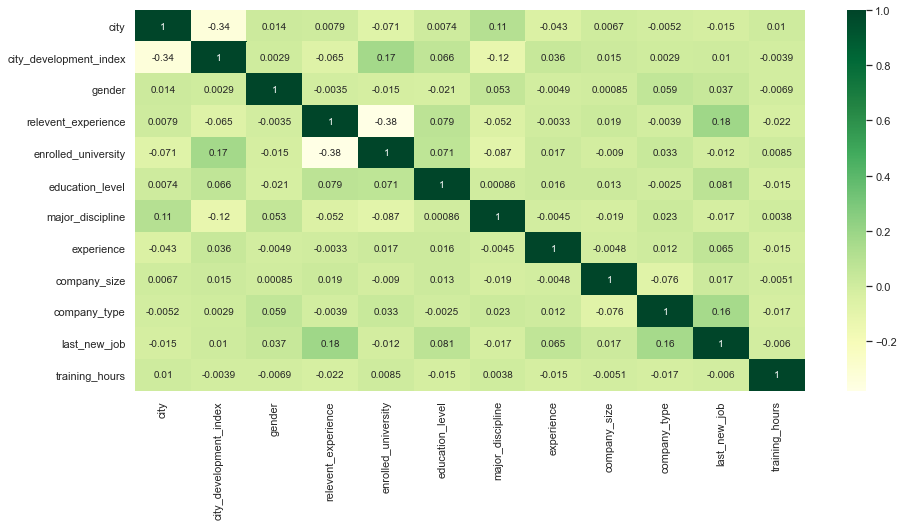

In [134]:
plt.figure(figsize=(15,7))
sns.heatmap(pd.DataFrame(X_train,columns=X.columns).corr(), annot=True,cmap='YlGn')

### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.7273915834078747 (0.01289856438754231)


In [136]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

[2.53683669]
[[-0.49997859 -3.94147565 -0.16024078  0.53271699 -0.77423591 -1.28556166
  -0.18509016  0.01928365 -0.06300421  0.11304035 -0.36891696 -0.2861126 ]]
Confusion Matrix Training
[[10149   636]
 [ 2784   799]]
Confusion Matrix Testing
[[3392  204]
 [ 927  267]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.78      0.94      0.86     10785
           1       0.56      0.22      0.32      3583

    accuracy                           0.76     14368
   macro avg       0.67      0.58      0.59     14368
weighted avg       0.73      0.76      0.72     14368

Classification Report Testing
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      3596
           1       0.57      0.22      0.32      1194

    accuracy                           0.76      4790
   macro avg       0.68      0.58      0.59      4790
weighted avg       0.73      0.76      0.72      4790

ROC AUC Train

### Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.7197340983496902 (0.016293707167721314)


In [138]:
model.fit(X_train,y_train)
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[8811 1974]
 [1664 1919]]
Confusion Matrix Testing
[[2889  707]
 [ 541  653]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     10785
           1       0.49      0.54      0.51      3583

    accuracy                           0.75     14368
   macro avg       0.67      0.68      0.67     14368
weighted avg       0.75      0.75      0.75     14368

Classification Report Testing
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3596
           1       0.48      0.55      0.51      1194

    accuracy                           0.74      4790
   macro avg       0.66      0.68      0.67      4790
weighted avg       0.75      0.74      0.74      4790

ROC AUC Train = 0.7207229420442254
Gini Train = 0.44144588408845076
ROC AUC Test = 0.7193111227252316
Gini Test = 0.43862224545046313


### CatBoost

In [139]:
from catboost import CatBoostClassifier as cb

model = cb(iterations=100,depth=4,learning_rate=0.1,loss_function='Logloss',
           verbose=True,custom_metric=['Logloss', 'AUC'])
model = model.fit(pd.DataFrame(X_train),y_train)

from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

0:	learn: 0.6594194	total: 3.49ms	remaining: 345ms
1:	learn: 0.6309630	total: 6.53ms	remaining: 320ms
2:	learn: 0.6078285	total: 9.4ms	remaining: 304ms
3:	learn: 0.5879956	total: 12.1ms	remaining: 291ms
4:	learn: 0.5725772	total: 15.2ms	remaining: 289ms
5:	learn: 0.5588964	total: 18.1ms	remaining: 283ms
6:	learn: 0.5473597	total: 20.8ms	remaining: 276ms
7:	learn: 0.5378750	total: 23.4ms	remaining: 269ms
8:	learn: 0.5294808	total: 26.4ms	remaining: 267ms
9:	learn: 0.5224398	total: 29.4ms	remaining: 264ms
10:	learn: 0.5154210	total: 32.7ms	remaining: 265ms
11:	learn: 0.5098648	total: 36.4ms	remaining: 267ms
12:	learn: 0.5044882	total: 40.9ms	remaining: 274ms
13:	learn: 0.5001633	total: 45.4ms	remaining: 279ms
14:	learn: 0.4966754	total: 50.7ms	remaining: 288ms
15:	learn: 0.4934444	total: 54ms	remaining: 283ms
16:	learn: 0.4905824	total: 58.4ms	remaining: 285ms
17:	learn: 0.4881267	total: 63.6ms	remaining: 290ms
18:	learn: 0.4856091	total: 68.1ms	remaining: 290ms
19:	learn: 0.4838843	tota

## Case 3: KNN Imputer Technique

In [140]:
df = df_original_before_imp.copy()

### Train Test Split

In [141]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(14368, 12)
(4790, 12)
(14368,)
(4790,)
0.0    0.750626
1.0    0.249374
Name: target, dtype: float64
0.0    0.750731
1.0    0.249269
Name: target, dtype: float64


### Outlier Detection

In [142]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01,novelty=True)
clf.fit(X_train[num_variables])
X_train['outlier'] = clf.predict(X_train[num_variables])
X_test['outlier'] = clf.predict(X_test[num_variables])
print(X_train['outlier'].value_counts())
print(X_test['outlier'].value_counts())

 1    14259
-1      109
Name: outlier, dtype: int64
 1    4758
-1      32
Name: outlier, dtype: int64


In [143]:
for col in num_variables:
    X_train[col] = list(map(lambda x,y: np.nan if y == -1 else x,X_train[col],X_train['outlier']))
    X_test[col] = list(map(lambda x,y: np.nan if y == -1 else x,X_test[col],X_test['outlier']))
X_train.drop(['outlier'],1,inplace=True)
X_test.drop(['outlier'],1,inplace=True)

print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                         0
city_development_index     109
gender                    3351
relevent_experience          0
enrolled_university        292
education_level            345
major_discipline          2127
experience                  48
company_size              4420
company_type              4590
last_new_job               318
training_hours             109
dtype: int64


city                         0
city_development_index      32
gender                    1157
relevent_experience          0
enrolled_university         94
education_level            115
major_discipline           686
experience                  17
company_size              1518
company_type              1550
last_new_job               105
training_hours              32
dtype: int64


### Handling Categorical Data

In [144]:
X_temp = pd.concat([X_train,X_test])
for col in cat_variables:
    if col != target:
        l1 = X_temp[col].value_counts().reset_index().sort_values('index')['index'].tolist()
        l2 = list(range(len(l1)))
        l = {l1[i]: l2[i] for i in range(len(l1))}
        X_train[col].replace(l,inplace=True)
        X_test[col].replace(l,inplace=True)

In [145]:
from sklearn.preprocessing import LabelEncoder
lcoder = LabelEncoder()
y_train= lcoder.fit_transform(y_train)
y_test= lcoder.transform(y_test)

### Missing Values Handling: KNN Imputer

In [146]:
print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                         0
city_development_index     109
gender                    3351
relevent_experience          0
enrolled_university        292
education_level            345
major_discipline          2127
experience                  48
company_size              4420
company_type              4590
last_new_job               318
training_hours             109
dtype: int64


city                         0
city_development_index      32
gender                    1157
relevent_experience          0
enrolled_university         94
education_level            115
major_discipline           686
experience                  17
company_size              1518
company_type              1550
last_new_job               105
training_hours              32
dtype: int64


In [147]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [149]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)
print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


### Scaling Data

In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<AxesSubplot:>

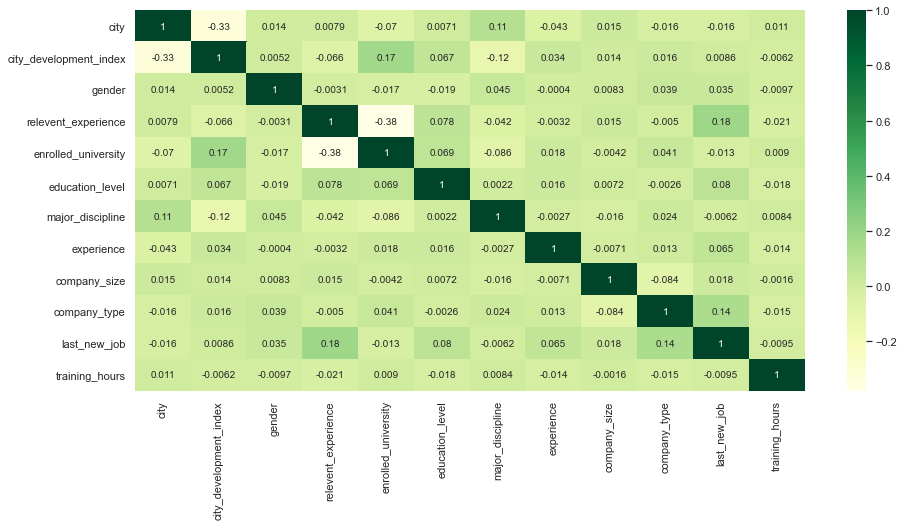

In [151]:
plt.figure(figsize=(15,7))
sns.heatmap(pd.DataFrame(X_train,columns=X.columns).corr(), annot=True,cmap='YlGn')

### Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.7304382094657765 (0.0134322931628815)


In [153]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

[1.9107844]
[[-4.81949474e-01 -3.09908017e+00 -2.33090054e-01  5.32120763e-01
  -3.48035967e-01 -8.25742229e-01 -1.33897934e-01  4.75678850e-05
  -8.84349662e-02  1.71267223e-02 -1.75473549e-01 -2.33697856e-01]]
Confusion Matrix Training
[[10133   652]
 [ 2741   842]]
Confusion Matrix Testing
[[3386  210]
 [ 909  285]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     10785
           1       0.56      0.23      0.33      3583

    accuracy                           0.76     14368
   macro avg       0.68      0.59      0.59     14368
weighted avg       0.73      0.76      0.73     14368

Classification Report Testing
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      3596
           1       0.58      0.24      0.34      1194

    accuracy                           0.77      4790
   macro avg       0.68      0.59      0.60      4790
weighted avg       

### Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.7263658013384106 (0.016015520563825974)


In [155]:
model.fit(X_train,y_train)
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[8712 2073]
 [1605 1978]]
Confusion Matrix Testing
[[2851  745]
 [ 518  676]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     10785
           1       0.49      0.55      0.52      3583

    accuracy                           0.74     14368
   macro avg       0.67      0.68      0.67     14368
weighted avg       0.76      0.74      0.75     14368

Classification Report Testing
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3596
           1       0.48      0.57      0.52      1194

    accuracy                           0.74      4790
   macro avg       0.66      0.68      0.67      4790
weighted avg       0.75      0.74      0.74      4790

ROC AUC Train = 0.727180831648343
Gini Train = 0.45436166329668604
ROC AUC Test = 0.7281209300115706
Gini Test = 0.45624186002314127


### CatBoost

In [156]:
from catboost import CatBoostClassifier as cb

model = cb(iterations=100,depth=4,learning_rate=0.1,loss_function='Logloss',
           verbose=True,custom_metric=['Logloss', 'AUC'])
model = model.fit(pd.DataFrame(X_train),y_train)

from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

0:	learn: 0.6583158	total: 2.99ms	remaining: 296ms
1:	learn: 0.6300660	total: 5.41ms	remaining: 265ms
2:	learn: 0.6081724	total: 7.64ms	remaining: 247ms
3:	learn: 0.5880866	total: 9.94ms	remaining: 238ms
4:	learn: 0.5711051	total: 12.3ms	remaining: 234ms
5:	learn: 0.5562987	total: 14.7ms	remaining: 231ms
6:	learn: 0.5443461	total: 17.3ms	remaining: 229ms
7:	learn: 0.5346478	total: 19.8ms	remaining: 227ms
8:	learn: 0.5256915	total: 22.2ms	remaining: 224ms
9:	learn: 0.5176112	total: 24.8ms	remaining: 223ms
10:	learn: 0.5117695	total: 27.2ms	remaining: 220ms
11:	learn: 0.5064203	total: 29.5ms	remaining: 216ms
12:	learn: 0.5023592	total: 31.8ms	remaining: 213ms
13:	learn: 0.4978053	total: 34.3ms	remaining: 211ms
14:	learn: 0.4939740	total: 36.7ms	remaining: 208ms
15:	learn: 0.4912243	total: 39.1ms	remaining: 205ms
16:	learn: 0.4883630	total: 41.6ms	remaining: 203ms
17:	learn: 0.4849014	total: 44.2ms	remaining: 202ms
18:	learn: 0.4828590	total: 46.7ms	remaining: 199ms
19:	learn: 0.4807716	t

## Case 4: Miss Forest Technique

In [170]:
df = df_original_before_imp.copy()

### Train Test Split

In [171]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                            random_state=42,shuffle=True,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(True))
print(y_test.value_counts(True))

(14368, 12)
(4790, 12)
(14368,)
(4790,)
0.0    0.750626
1.0    0.249374
Name: target, dtype: float64
0.0    0.750731
1.0    0.249269
Name: target, dtype: float64


### Outlier Detection

In [172]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01,novelty=True)
clf.fit(X_train[num_variables])
X_train['outlier'] = clf.predict(X_train[num_variables])
X_test['outlier'] = clf.predict(X_test[num_variables])
print(X_train['outlier'].value_counts())
print(X_test['outlier'].value_counts())

 1    14259
-1      109
Name: outlier, dtype: int64
 1    4758
-1      32
Name: outlier, dtype: int64


In [173]:
for col in num_variables:
    X_train[col] = list(map(lambda x,y: np.nan if y == -1 else x,X_train[col],X_train['outlier']))
    X_test[col] = list(map(lambda x,y: np.nan if y == -1 else x,X_test[col],X_test['outlier']))
X_train.drop(['outlier'],1,inplace=True)
X_test.drop(['outlier'],1,inplace=True)

print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                         0
city_development_index     109
gender                    3351
relevent_experience          0
enrolled_university        292
education_level            345
major_discipline          2127
experience                  48
company_size              4420
company_type              4590
last_new_job               318
training_hours             109
dtype: int64


city                         0
city_development_index      32
gender                    1157
relevent_experience          0
enrolled_university         94
education_level            115
major_discipline           686
experience                  17
company_size              1518
company_type              1550
last_new_job               105
training_hours              32
dtype: int64


### Handling Categorical Data

In [175]:
X_temp = pd.concat([X_train,X_test])
for col in cat_variables:
    if col != target:
        l1 = X_temp[col].value_counts().reset_index().sort_values('index')['index'].tolist()
        l2 = list(range(len(l1)))
        l = {l1[i]: l2[i] for i in range(len(l1))}
        X_train[col].replace(l,inplace=True)
        X_test[col].replace(l,inplace=True)

In [176]:
from sklearn.preprocessing import LabelEncoder
lcoder = LabelEncoder()
y_train= lcoder.fit_transform(y_train)
y_test= lcoder.transform(y_test)

### Missing Values Handling: Miss Forest

In [179]:
print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                         0
city_development_index     109
gender                    3351
relevent_experience          0
enrolled_university        292
education_level            345
major_discipline          2127
experience                  48
company_size              4420
company_type              4590
last_new_job               318
training_hours             109
dtype: int64


city                         0
city_development_index      32
gender                    1157
relevent_experience          0
enrolled_university         94
education_level            115
major_discipline           686
experience                  17
company_size              1518
company_type              1550
last_new_job               105
training_hours              32
dtype: int64


In [182]:
from missingpy import MissForest
imp = MissForest(max_iter=10, decreasing=False, missing_values=np.nan,
             n_estimators=100, criterion=('mse', 'gini'),
             max_depth=4, min_samples_split=2, max_features='auto',
             random_state=0,class_weight='balanced')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

Iteration: 0
Iteration: 1
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [185]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)
print(X_train.isnull().sum())
print('\n')
print(X_test.isnull().sum())

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


### Scaling Data

In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<AxesSubplot:>

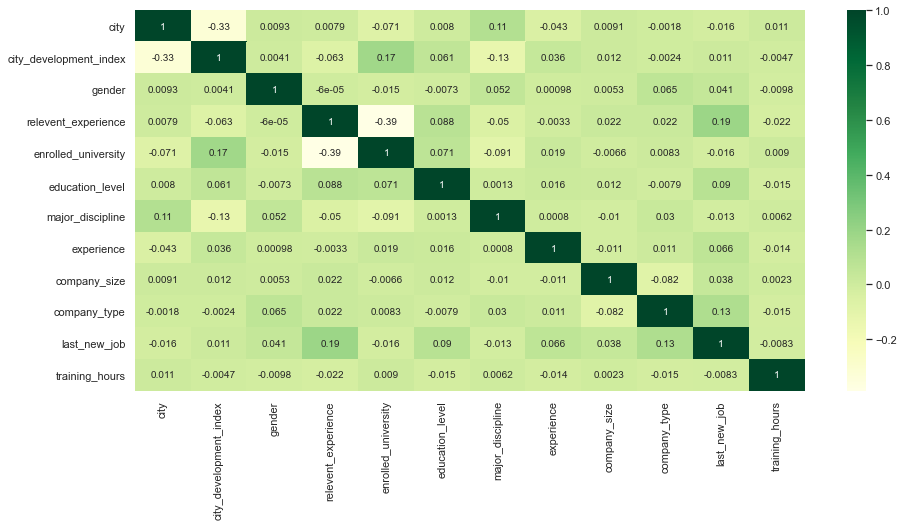

In [187]:
plt.figure(figsize=(15,7))
sns.heatmap(pd.DataFrame(X_train,columns=X.columns).corr(), annot=True,cmap='YlGn')

### Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = LogisticRegression(solver='liblinear', random_state=0,C=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Roc Auc Score: {np.mean(n_scores)} ({np.std(n_scores)})")

Roc Auc Score: 0.7306183968300014 (0.01308505775068252)


In [189]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

[1.7400962]
[[-0.47582015 -3.07225336 -0.25643117  0.54700217 -0.33895503 -0.85013601
  -0.12801451  0.00824662 -0.17815732  0.24157885 -0.19946591 -0.22721336]]
Confusion Matrix Training
[[10135   650]
 [ 2736   847]]
Confusion Matrix Testing
[[3380  216]
 [ 905  289]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     10785
           1       0.57      0.24      0.33      3583

    accuracy                           0.76     14368
   macro avg       0.68      0.59      0.60     14368
weighted avg       0.73      0.76      0.73     14368

Classification Report Testing
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      3596
           1       0.57      0.24      0.34      1194

    accuracy                           0.77      4790
   macro avg       0.68      0.59      0.60      4790
weighted avg       0.73      0.77      0.73      4790

ROC AUC Train 

### Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
model = RandomForestClassifier(criterion='gini',max_depth=4,min_samples_split=0.5,
        n_estimators=50,max_features='auto',bootstrap=True,class_weight='balanced',
        random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Accuracy: {np.mean(n_scores)} ({np.std(n_scores)})")

Accuracy: 0.7490645649668882 (0.014985174094529187)


In [191]:
model.fit(X_train,y_train)
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

Confusion Matrix Training
[[8681 2104]
 [1676 1907]]
Confusion Matrix Testing
[[2884  712]
 [ 541  653]]
Classification Report Training
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     10785
           1       0.48      0.53      0.50      3583

    accuracy                           0.74     14368
   macro avg       0.66      0.67      0.66     14368
weighted avg       0.75      0.74      0.74     14368

Classification Report Testing
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3596
           1       0.48      0.55      0.51      1194

    accuracy                           0.74      4790
   macro avg       0.66      0.67      0.67      4790
weighted avg       0.75      0.74      0.74      4790

ROC AUC Train = 0.7448798355081969
Gini Train = 0.48975967101639384
ROC AUC Test = 0.7514834787582705
Gini Test = 0.502966957516541


### CatBoost

In [192]:
from catboost import CatBoostClassifier as cb

model = cb(iterations=100,depth=4,learning_rate=0.1,loss_function='Logloss',
           verbose=True,custom_metric=['Logloss', 'AUC'])
model = model.fit(pd.DataFrame(X_train),y_train)

from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print('Confusion Matrix Training')
print(confusion_matrix(y_train,model.predict(X_train)))
print('Confusion Matrix Testing')
print(confusion_matrix(y_test,model.predict(X_test)))
print('Classification Report Training')
print(classification_report(y_train,model.predict(X_train)))
print('Classification Report Testing')
print(classification_report(y_test,model.predict(X_test)))

pred = [el[1] for el in model.predict_proba(X_train)]
auc = roc_auc_score(y_train,pred)
gini = 2*auc-1
print(f'ROC AUC Train = {auc}')
print(f'Gini Train = {gini}')
pred = [el[1] for el in model.predict_proba(X_test)]
auc = roc_auc_score(y_test,pred)
gini = 2*auc-1
print(f'ROC AUC Test = {auc}')
print(f'Gini Test = {gini}')

0:	learn: 0.6587491	total: 3.49ms	remaining: 346ms
1:	learn: 0.6312171	total: 6.41ms	remaining: 314ms
2:	learn: 0.6060853	total: 9.31ms	remaining: 301ms
3:	learn: 0.5871030	total: 12ms	remaining: 288ms
4:	learn: 0.5702849	total: 14.7ms	remaining: 278ms
5:	learn: 0.5529006	total: 17.3ms	remaining: 270ms
6:	learn: 0.5423512	total: 19.8ms	remaining: 263ms
7:	learn: 0.5322324	total: 22.7ms	remaining: 261ms
8:	learn: 0.5239787	total: 26.7ms	remaining: 270ms
9:	learn: 0.5156209	total: 29.6ms	remaining: 266ms
10:	learn: 0.5093934	total: 32.2ms	remaining: 260ms
11:	learn: 0.5028638	total: 34.9ms	remaining: 256ms
12:	learn: 0.4961004	total: 37.5ms	remaining: 251ms
13:	learn: 0.4899363	total: 40.1ms	remaining: 247ms
14:	learn: 0.4859225	total: 43.1ms	remaining: 244ms
15:	learn: 0.4832875	total: 45.8ms	remaining: 241ms
16:	learn: 0.4806058	total: 48.5ms	remaining: 237ms
17:	learn: 0.4769188	total: 51.2ms	remaining: 233ms
18:	learn: 0.4732939	total: 53.8ms	remaining: 230ms
19:	learn: 0.4701869	tot

# Summary